<a href="https://colab.research.google.com/github/rajeshmore1/Predict-whether-a-startup-will-get-funded-in-the-next-three-months./blob/main/Copy_of_Team_5_Capstone_Project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

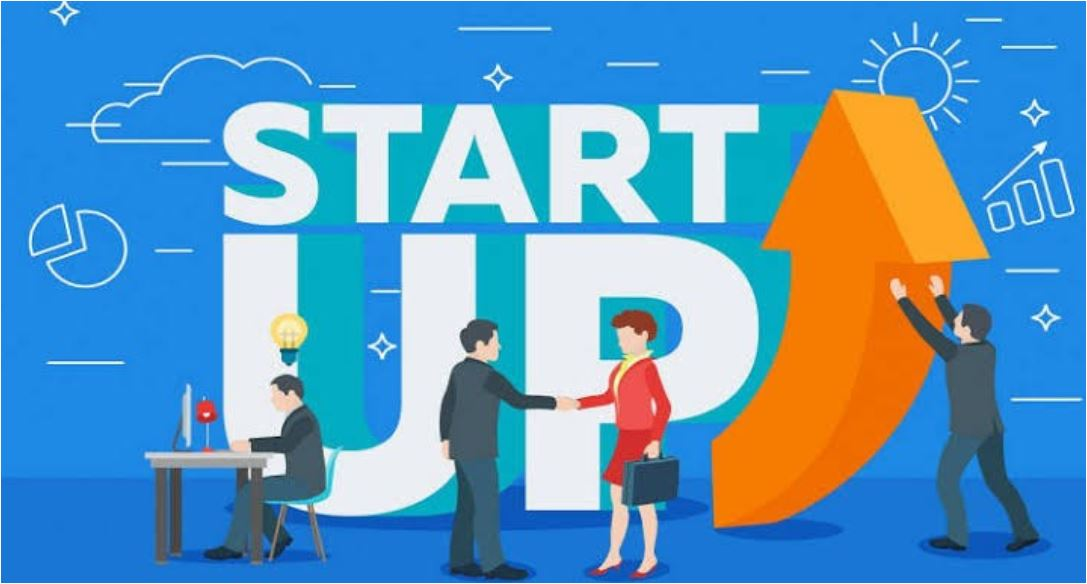

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import re # for regular expressions

In [ ]:
# Importing drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
working_dir_path = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Day 1/Copy of data_driven_investment_1.csv'
df = pd.read_csv(working_dir_path)

# Hypothesis

1. Generally people spend more time on the app which they like the most. So the popularity of business or app is directly propotional to the average time spend on app.
2.  The people must have good engagement ratio on apps or companies which already got some kind of fund.As if we consider the start ups which already recieved funds are well researched by the angel investors. Already funded startups have more resources to invest on multiple features on app and can can provide greater user/client happiness score.
3.  Uninstall rate(Churn rate) suggest us that initially users are attracted by the promises made by the companies/start-ups, hence they downloaded the app but later they uninstalled it. The reason might be, inter-alia, startup did not able to stand on their expectations.


In [ ]:
df.head()

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0


In [ ]:
# Checking shape of datafram. we have 1502175 rows and 20 columns
df.shape

(1502175, 20)

In [ ]:
# We have 89412 duplicate entries. we have to drop these entries
duplicate = df[df.duplicated()] 
duplicate.shape

(89412, 20)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
# Checking the size of dataframe after dropping the duplicates. The data size is reduced now.
df.shape

(1412763, 20)

In [ ]:
df.isna().sum()

UUID                        969
month                         0
Application Category          0
Avg_Session_Time         535031
Business Models         1410459
City                    1410466
Company Stage           1410459
Feed Name               1410459
Founded Year            1410459
Latest Funded Date      1410459
MAU                     1294676
Open_Rate                535048
Overview                1410459
Practice Areas          1410459
Reach                    451300
Region                        0
Total Funding (USD)     1410605
Total_Session_Time       535098
Uninstall_Rate          1060560
funding_ind                   0
dtype: int64

In [ ]:
# Checking various data types and null values in our given features. There are large amount of null values in our dataset.
# The datatype of various columns are object, int and float.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1412763 entries, 0 to 1502174
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   UUID                  1411794 non-null  object 
 1   month                 1412763 non-null  int64  
 2   Application Category  1412763 non-null  object 
 3   Avg_Session_Time      877732 non-null   float64
 4   Business Models       2304 non-null     object 
 5   City                  2297 non-null     object 
 6   Company Stage         2304 non-null     object 
 7   Feed Name             2304 non-null     object 
 8   Founded Year          2304 non-null     float64
 9   Latest Funded Date    2304 non-null     object 
 10  MAU                   118087 non-null   float64
 11  Open_Rate             877715 non-null   float64
 12  Overview              2304 non-null     object 
 13  Practice Areas        2304 non-null     object 
 14  Reach                 961463 non-n

In [ ]:
# We are given with the following feature. In order to solve prblem we have to do feature engineering.
df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Business Models', 'City', 'Company Stage', 'Feed Name', 'Founded Year',
       'Latest Funded Date', 'MAU', 'Open_Rate', 'Overview', 'Practice Areas',
       'Reach', 'Region', 'Total Funding (USD)', 'Total_Session_Time',
       'Uninstall_Rate', 'funding_ind'],
      dtype='object')

In [ ]:
#Count of Funded Startups. We have 2304 start ups which are already funded.
df['funding_ind'].value_counts()

0    1410459
1       2304
Name: funding_ind, dtype: int64

In [ ]:
#Checking where there is no UUID and droping those if no funds recieved as it will be of no use.
# There are 969 null entries in UUID column. 
len(df[df['UUID'].isna()])

969

In [ ]:
# Subset of data where UUID is not null
df = df[df['UUID'].notna()]

In [ ]:
# After dropping the null values in UUID we are getting the following shape.
df.shape

(1411794, 20)

In [ ]:
# Checkin the Duration of Data
print(df['month'].min(),'- start')
print(df['month'].max(), '- end')

20180701 - start
20200601 - end


In [ ]:
# checking for null values in the dataset
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1) 

,Null Values,% Missing Values
UUID,0,0.000000
month,0,0.000000
Application Category,0,0.000000
Avg_Session_Time,534728,37.875781
Business Models,1409490,99.836803
City,1409497,99.837299
Company Stage,1409490,99.836803
Feed Name,1409490,99.836803
Founded Year,1409490,99.836803
Latest Funded Date,1409490,99.836803


In [ ]:
# We are getting some statistical insights from various numerical columns
df.describe()

,month,Avg_Session_Time,Founded Year,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
count,1.411794e+06,877066.000000,2304.000000,118029.000000,877049.000000,9.608760e+05,2.158000e+03,876999.000000,352019.000000,1.411794e+06
mean,2.019699e+07,1.623743,2014.674913,0.398473,3.940348,1.167229e-03,7.956808e+07,5.964486,0.144678,1.631966e-03
std,5.644499e+03,2.253606,4.025511,0.208623,4.536652,1.767460e-02,3.328651e+08,9.593833,0.130921,4.036464e-02
min,2.018070e+07,0.000033,1983.000000,0.000019,1.000000,0.000000e+00,6.200000e+01,0.000033,0.000000,0.000000e+00
25%,2.019120e+07,0.417850,2014.000000,0.235294,1.875000,5.916265e-07,2.014807e+06,1.085991,0.056747,0.000000e+00
50%,2.020030e+07,0.890115,2015.000000,0.388889,2.933333,1.021471e-05,8.151818e+06,2.727304,0.107459,0.000000e+00
75%,2.020040e+07,1.917849,2017.000000,0.546268,4.500000,8.830537e-05,4.000000e+07,6.615261,0.190871,0.000000e+00
max,2.020060e+07,58.561333,2020.000000,1.000000,80.000000,9.990408e-01,7.201430e+09,149.983317,1.000000,1.000000e+00


**Getting insights from Total funding(USD) column**

In [ ]:
# There are 1409636 startups aplications which haven't yet recieved funding in past.
df['Total Funding (USD)'].isna().sum()

1409636

In [ ]:
# Minimum amount received by any company is 62 USD only. Maximum amount of $ 7201429984 USD received by 2 companies in theree different categories.
print("Min Amount")
print(df["Total Funding (USD)"].min())
print("Mean Amount")
print(round(df["Total Funding (USD)"].mean(),2))
print("Median Amount")
print(df["Total Funding (USD)"].median())
print("Max Amount")
print(df["Total Funding (USD)"].max())
print("Standard Deviation Amount")
print(round(df["Total Funding (USD)"].std(),2))

Min Amount
62.0
Mean Amount
79568080.47
Median Amount
8151818.0
Max Amount
7201429984.0
Standard Deviation Amount
332865098.65


In [ ]:
# 3 start ups recieved highest funding. They worked in the areas like shopping,business and Social. All are based in Bangalore city and all are acquired by some other company.
df[df['Total Funding (USD)']==7201429984]


,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
586621,25d602cbb8fe3b2be3abbc38056c7c8ba2e5483f,20200601,Shopping,2.306675,Horizontal E-Commerce > Marketplace,Bangalore,Acquired,Horizontal E-Commerce,2007.0,2020-09-16,0.725223,4.501723,Online marketplace offering multi-category pro...,Retail\nCovid-19,0.422252,National,7.201430e+09,10.361766,0.023394,1
586622,25d602cbb8fe3b2be3abbc38056c7c8ba2e5483f,20200601,Business,0.788551,Horizontal E-Commerce > Marketplace,Bangalore,Acquired,Horizontal E-Commerce,2007.0,2020-09-16,0.562418,9.968127,Online marketplace offering multi-category pro...,Retail\nCovid-19,0.001076,National,7.201430e+09,7.637852,0.108967,1
593461,cda9435bb7af9ee517fe018080d7f081a36c9397,20200601,Social,4.959111,Horizontal E-Commerce > Marketplace,Bangalore,Acquired,Horizontal E-Commerce,2007.0,2020-09-16,0.517502,5.633894,Online marketplace offering multi-category pro...,Retail\nCovid-19,0.001452,National,7.201430e+09,27.556655,0.228422,1


In [ ]:
# Minimum funding recieved by a single company. It get funding 3 times and its based in Ahmedabad.
df[df['Total Funding (USD)']==62]


,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
422345,1112e0a33c018e4998e2a1fd5cd90d4dbf200730,20190201,Shopping,NaN,Coupons and Deals > Rewards & Cashback > O2O >...,Ahmedabad,Seed,Coupons and Deals,2016.0,2019-03-27,NaN,NaN,App-based platform for rewards & cash backs,Retail,0.000258,National,62.0,NaN,0.044693,1
750087,1112e0a33c018e4998e2a1fd5cd90d4dbf200730,20181201,Shopping,NaN,Coupons and Deals > Rewards & Cashback > O2O >...,Ahmedabad,Seed,Coupons and Deals,2016.0,2019-03-27,NaN,NaN,App-based platform for rewards & cash backs,Retail,0.000264,National,62.0,NaN,0.114286,1
1492142,1112e0a33c018e4998e2a1fd5cd90d4dbf200730,20190101,Shopping,NaN,Coupons and Deals > Rewards & Cashback > O2O >...,Ahmedabad,Seed,Coupons and Deals,2016.0,2019-03-27,NaN,NaN,App-based platform for rewards & cash backs,Retail,0.000256,National,62.0,NaN,0.055046,1


In [ ]:
# lets check the startups with more than 50crore+ funding
# There are 1813 startups which recievs more than 1 million funding
#80 starts received more than 50 Cr USD or 50 million
onemillion = df[df['Total Funding (USD)'] > 1000000].sort_values(by ='Total Funding (USD)', ascending = False)
onemillion.shape

(1722, 20)

In [ ]:
# lets check the startups with more than 50crore+ funding

#80 starts received more than 50 Cr USD or 50 million
Fifty = df[df['Total Funding (USD)'] > 500000000].sort_values(by ='Total Funding (USD)', ascending = False)
Fifty.shape

(80, 20)

In [ ]:
# Average Funding is 77million dolloars
print("On an Average indian startups got funding of : ", df["Total Funding (USD)"].dropna().sort_values().mean())

On an Average indian startups got funding of :  79568080.47451344


**Getting insight from region column**

In [ ]:
# It seems all startups are belong to the India only.
df['Region'].value_counts()

National    1411794
Name: Region, dtype: int64

In [ ]:
# There are 132 differen types of pracice areas in which startups are working. They are FinTech, Consumer, Media and Entertainment etc
df['Practice Areas'].value_counts()

FinTech                                    294
Consumer\nMedia & Entertainment\nEdTech    196
Consumer                                   117
EdTech\nEdTech\nAccelerator Batches        116
Food\nConsumer Goods                       113
                                          ... 
Consumer\nEdTech\nEdTech                     1
FinTech\nEdTech\nFinancial Services          1
Consumer\nAuto Tech\nFinTech\nInsurTech      1
Technology\nTechnology\nConsumer             1
HealthTech\nCovid-19\nConsumer               1
Name: Practice Areas, Length: 132, dtype: int64

In [ ]:
#Overview of companies
df['Overview'].value_counts()

Q&A-based education community                                           195
Online marketplace for study material                                   113
Manufactures and supplies cold pressed juice for women's health         113
App-based online marketplace for video commerce                         107
Developer of Puja products                                               99
                                                                       ... 
Expense management platform for corporates                                1
Provider of AI-based English tutor platform                               1
Health information portal                                                 1
AI based personal mobile assistant with support for Indian languages      1
Provider of a news aggregator app                                         1
Name: Overview, Length: 323, dtype: int64

In [ ]:
# large number of companies are founded in 2018
df['Founded Year'].value_counts()

2018.0    377
2016.0    367
2015.0    339
2014.0    304
2017.0    229
2019.0    160
2011.0    109
2013.0     91
2012.0     88
2000.0     69
2010.0     51
2009.0     48
2008.0     42
2020.0      8
2006.0      6
2007.0      6
1995.0      6
1984.0      2
2004.0      1
1983.0      1
Name: Founded Year, dtype: int64

In [ ]:
# Looking for unique entries in Comapny Stage column
df['Company Stage'].unique()

array([nan, 'Series A', 'Seed', 'Series B', 'Series D', 'Series C',
       'Series H', 'Acquired', 'Series E', 'Series I', 'Series F',
       'Funded', 'Series G'], dtype=object)

In [ ]:
# There are different stages of fundings like seed, series A etc. Large number of companies got  seed funding.Very few got series G funding.
df['Company Stage'].value_counts()

Seed        1054
Series A     344
Series B     338
Series C     241
Series D     150
Acquired      49
Series I      37
Series F      35
Series H      33
Series E      16
Funded         4
Series G       3
Name: Company Stage, dtype: int64

Seed        1054
Series A     344
Series B     338
Series C     241
Series D     150
Acquired      49
Series I      37
Series F      35
Series H      33
Series E      16
Funded         4
Series G       3
Name: Company Stage, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


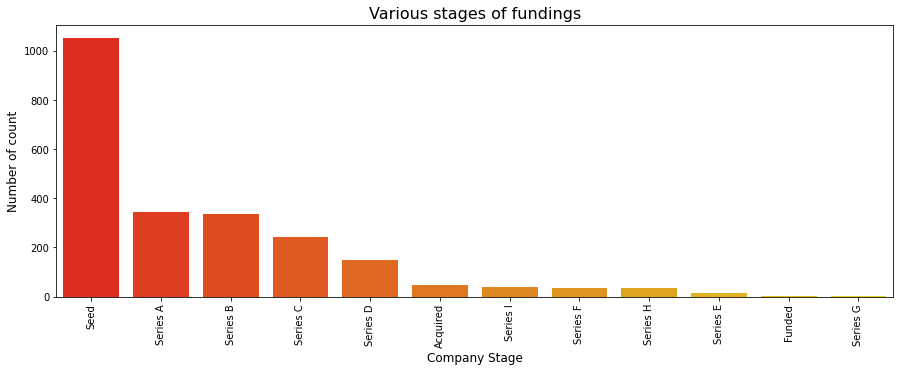

In [ ]:
# lets analyze the company stage

industry = df['Company Stage'].value_counts().head(15)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Company Stage', fontsize=12)
plt.ylabel('Number of count', fontsize=12)
plt.title("Various stages of fundings", fontsize=16)
plt.show()

In [ ]:
# The mean funding of startups which fall in Series A of company stage
df[df['Company Stage']  == 'Series A' ]['Total Funding (USD)'].mean()

16640890.299418604

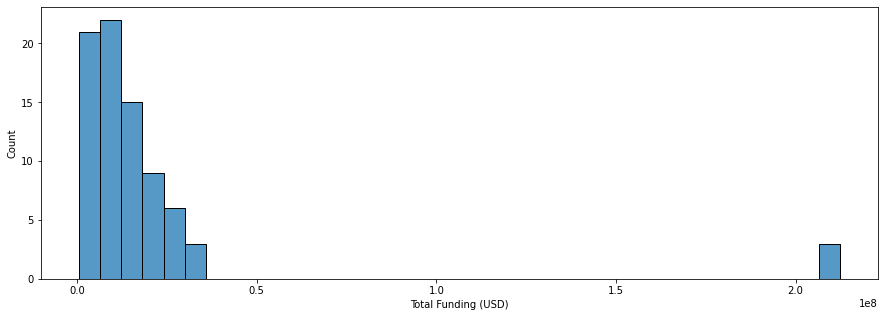

In [ ]:
sns.histplot(df[df['Company Stage']  == 'Series A' ].dropna()['Total Funding (USD)'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


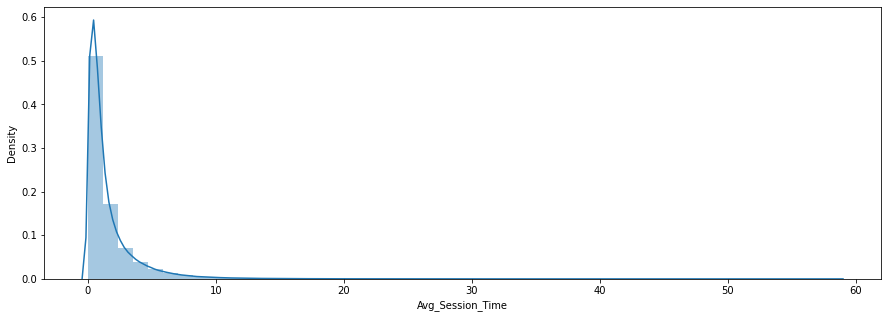

In [ ]:
# Average session time is positively skewed in our database
sns.distplot(df.Avg_Session_Time)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


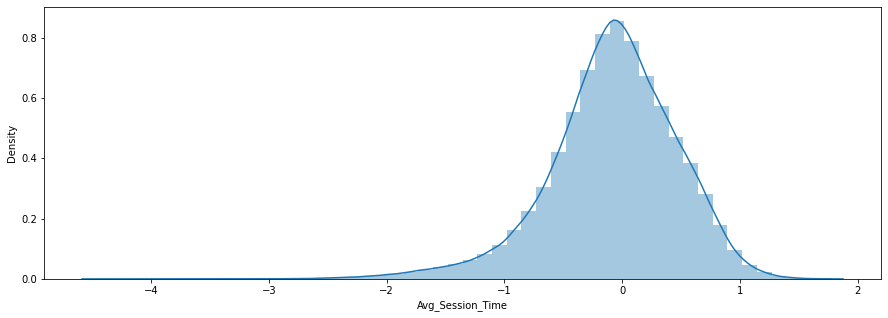

In [ ]:
# By taking log transformation we are changing the distribution of average session time into normal distribution
sns.distplot(np.log10(df.Avg_Session_Time))

In [ ]:
# Let us check for Mean average session time an Midean Avg_session time
# Median Avg_Session_Time for each Company Stage
print("Company_Stage  Median Avg_Session_Time")
for stage in df['Company Stage'].unique()[1:]:
  print(stage,end=":\t")
  print(df[df['Company Stage']== stage]['Avg_Session_Time'].median())
  print()

Company_Stage  Median Avg_Session_Time
Series A:	0.8465666666666666

Seed:	1.148220512820513

Series B:	1.3159495464325568

Series D:	1.1877597818775476

Series C:	0.9542040355615482

Series H:	1.0398141319678857

Acquired:	1.359713622404322

Series E:	2.257690865591402

Series I:	0.6084284571679509

Series F:	1.3817414865250521

Funded:	4.015873104070217

Series G:	1.4983100214294758



In [ ]:
# Mean Avg_Session_Time for each Company Stage
print("Company_Stage  Mean Avg_Session_Time")
for stage in df['Company Stage'].unique()[1:]:
  print(stage,end=":\t")
  print(df[df['Company Stage']== stage]['Avg_Session_Time'].mean())
  print()

Company_Stage  Mean Avg_Session_Time
Series A:	1.3928945914831694

Seed:	1.8950184888406054

Series B:	2.43135449561821

Series D:	1.5445236571738787

Series C:	1.5792414562754316

Series H:	1.0699148538314946

Acquired:	1.4737326445464154

Series E:	1.5992154684920021

Series I:	0.6347854630185972

Series F:	1.347736590610043

Funded:	4.073137388757522

Series G:	1.4983100214294758



In [ ]:
# Mean Uninstall Rate for each Company Stage
print("Company_Stage  Mean Uninstall Rate")
for stage in df['Company Stage'].unique()[1:]:
  print(stage,end=":\t")
  print(df[df['Company Stage']== stage]['Uninstall_Rate'].mean())
  print()

Company_Stage  Mean Uninstall Rate
Series A:	0.13486810338064079

Seed:	0.16047454989972912

Series B:	0.20353340447788157

Series D:	0.12469005848941926

Series C:	0.1462276424964329

Series H:	0.10950911243866461

Acquired:	0.12213158231566766

Series E:	0.08777738580038058

Series I:	0.0952301291732481

Series F:	0.1615591730296482

Funded:	0.07275132275132273

Series G:	0.14884545201161054



**Analysing UUID**

In [ ]:
# The value count of the startup having 4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27  UUID is largest among all the startups.
df['UUID'].value_counts()

4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27    2654
a8febb4b767f83022235f3f34a2241ed1e13db2f    1670
061d769832ed6fa2e6f5f7923348f7f074e6aa91    1529
ec1cd22193eda5ec91905247ea3079ae84e2dd30    1224
03fb932e41ef68f1df45e0b20f326de05ebd438c    1086
                                            ... 
f4b21eedf4360bd78fe24e317296b567ade8860d       1
f1c9a84e2c1eb56bc6e73a4f0d51fbc32c68fe22       1
35d86a4889760e0d9522277c3fd24e5a4198eb78       1
a2893d3507f9618729537410eff9d307fb8bd8a8       1
9ab0b887030bec8999571b629c6ff0e3544eb524       1
Name: UUID, Length: 147741, dtype: int64

In [ ]:
# The start up having "4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27" have the highest frequency in our database.
df['UUID'].describe()

count                                      1411794
unique                                      147741
top       4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27
freq                                          2654
Name: UUID, dtype: object

In [ ]:
# We have already removed the null values in this column hence its showing 0 null values.
df['UUID'].isnull().sum()

0

In [ ]:
# We are looking into null values of various columns. These are the null values where UUID column is NOT null.
df[~df['UUID'].isnull()].isnull().sum()

UUID                          0
month                         0
Application Category          0
Avg_Session_Time         534728
Business Models         1409490
City                    1409497
Company Stage           1409490
Feed Name               1409490
Founded Year            1409490
Latest Funded Date      1409490
MAU                     1293765
Open_Rate                534745
Overview                1409490
Practice Areas          1409490
Reach                    450918
Region                        0
Total Funding (USD)     1409636
Total_Session_Time       534795
Uninstall_Rate          1059775
funding_ind                   0
dtype: int64

In [ ]:
null_avg_time = df[df['Avg_Session_Time'].isnull()]
null_avg_time.head(15)

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0
5,3d82666e19078799205cee6998a6c5dd8b6add2a,20180801,Travel & Local,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000927,National,NaN,NaN,0.094488,0
6,7dd8f8918e91940bb6f8af0b4889fedaf421d0db,20180801,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000280,National,NaN,NaN,0.096774,0
7,029c8ea1565578af1d3a79dfd186ad6e590ce362,20180801,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000514,National,NaN,NaN,0.134831,0
8,08a19c746c758161bc0436f74163f5e206dad50b,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000021,National,NaN,NaN,0.000000,0
9,0d30ce53c1f76f5ee21425b461ebf28e82728505,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000260,National,NaN,NaN,0.114754,0


In [ ]:
null_avg_time.shape


(534728, 20)

In [ ]:
null_avg_time.isnull().sum()

UUID                         0
month                        0
Application Category         0
Avg_Session_Time        534728
Business Models         533990
City                    533993
Company Stage           533990
Feed Name               533990
Founded Year            533990
Latest Funded Date      533990
MAU                     534687
Open_Rate               534666
Overview                533990
Practice Areas          533990
Reach                      113
Region                       0
Total Funding (USD)     534055
Total_Session_Time      534689
Uninstall_Rate          295067
funding_ind                  0
dtype: int64

In [ ]:
null_avg_time['funding_ind'].value_counts()

0    533990
1       738
Name: funding_ind, dtype: int64

In [ ]:
df['City'].value_counts()

Bangalore                   677
Gurgaon                     485
Delhi                       437
Mumbai                      352
Kingstown\nMumbai            96
Pune                         65
Noida                        35
Hyderabad                    28
San Mateo\nChennai           21
Chennai                      21
Ahmedabad                    16
Kolkata                       7
Jaipur                        7
Dublin\nBangalore             6
Kota                          6
Singapore\nGurgaon            5
Coimbatore                    3
Singapore\nBangalore          3
London                        3
Bhopal                        3
Bangalore\nMumbai             3
San Francisco\nBangalore      3
Panaji                        3
Hangzhou\nDelhi               3
Fremont\nMumbai               2
Chicago\nNoida                2
Kochi                         2
Kanpur                        1
Faridabad                     1
London\nNoida                 1
Name: City, dtype: int64

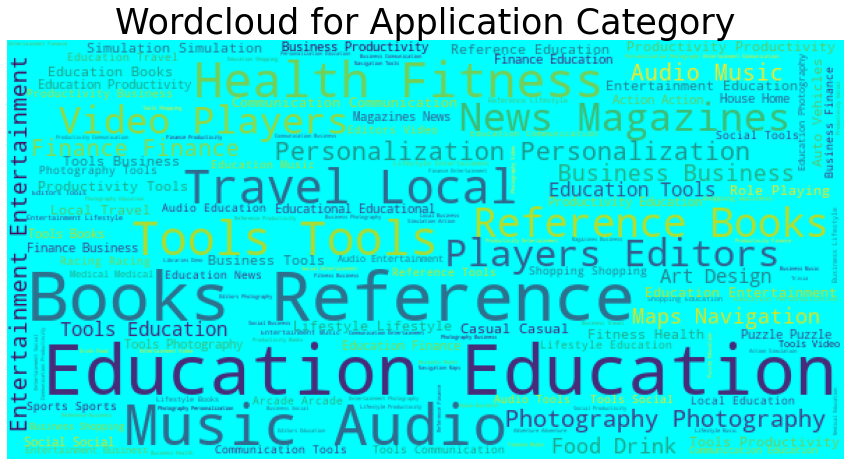

In [ ]:
# The words like Education, Booke reference, Music, Audio Tools, Health Fitness are having the maximum frequency in Application Category
from wordcloud import WordCloud

names = df["Application Category"][~pd.isnull(df["Application Category"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Application Category", fontsize=35)
plt.axis("off")
plt.show()

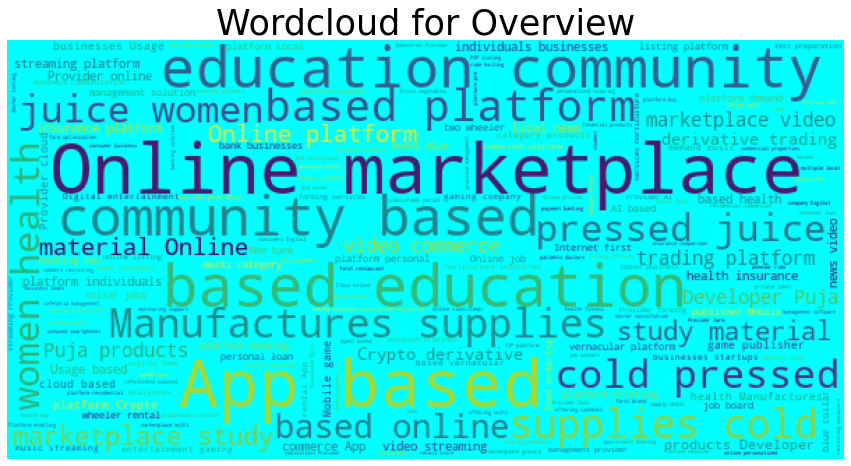

In [ ]:
# The words like Online marketplace, App based, education, women health processed juice are having maximum frequency in Overview column
from wordcloud import WordCloud

names = df["Overview"][~pd.isnull(df["Overview"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Overview", fontsize=35)
plt.axis("off")
plt.show()

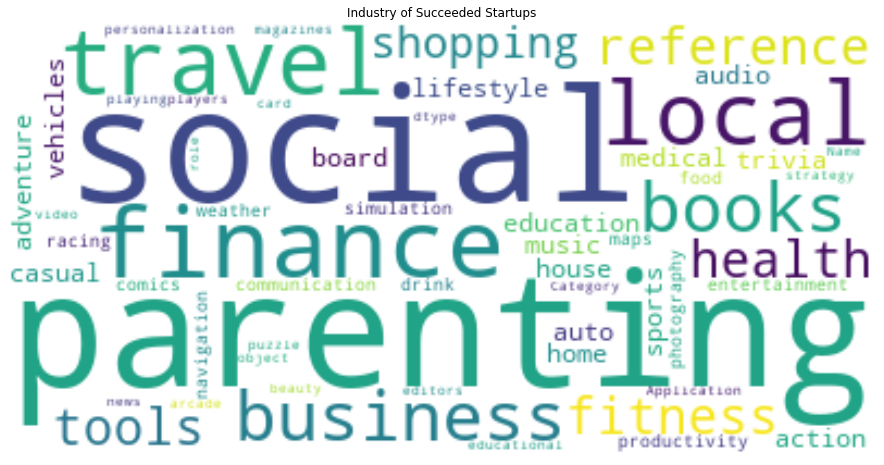

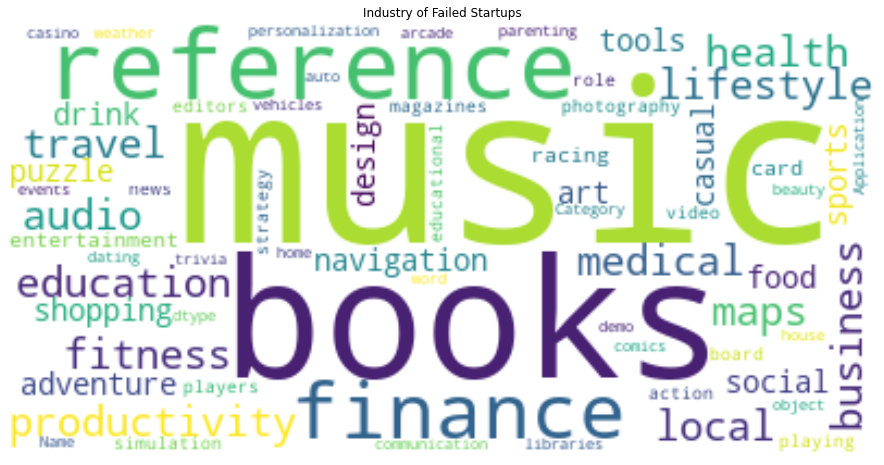

In [ ]:
# industry of company which succeeded
# The frequency of words like parental, socila, books, music are highest in the Application category of startusc which got funds.
success=df[df['funding_ind']==1]
text2 =success["Application Category"].replace({"'":" "}).str.lower().dropna().drop_duplicates()
plt.figure(figsize=(16,8))
# Create and generate a word cloud image:
wordcloud2 = WordCloud(background_color='white').generate(str(text2))
# Display the generated image:
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title("Industry of Succeeded Startups")
plt.show()
# industry of company which failed
failed=df[df['funding_ind']==0]
text3 =failed["Application Category"].replace({"'":" "}).str.lower().dropna().drop_duplicates()
plt.figure(figsize=(16,8))
# Create and generate a word cloud image:
wordcloud3 = WordCloud(background_color='white').generate(str(text3))
# Display the generated image:
plt.imshow(wordcloud3, interpolation='bilinear')
plt.title("Industry of Failed Startups")
plt.axis("off")
plt.show()

In [ ]:
# Copy of Data for future use
data = df.copy()

In [ ]:
# Features that are only for funded Start up
Funded_features = ['Business Models', 'City', 'Company Stage', 'Feed Name', 'Founded Year', 'Latest Funded Date', 'MAU', 'Overview', 'Practice Areas', 'Total Funding (USD)', 'Uninstall_Rate']

In [ ]:
data.drop(Funded_features, axis = 1, inplace=True)

In [ ]:
data.shape

(1411794, 9)

In [ ]:
data.isna().sum()

UUID                         0
month                        0
Application Category         0
Avg_Session_Time        534728
Open_Rate               534745
Reach                   450918
Region                       0
Total_Session_Time      534795
funding_ind                  0
dtype: int64

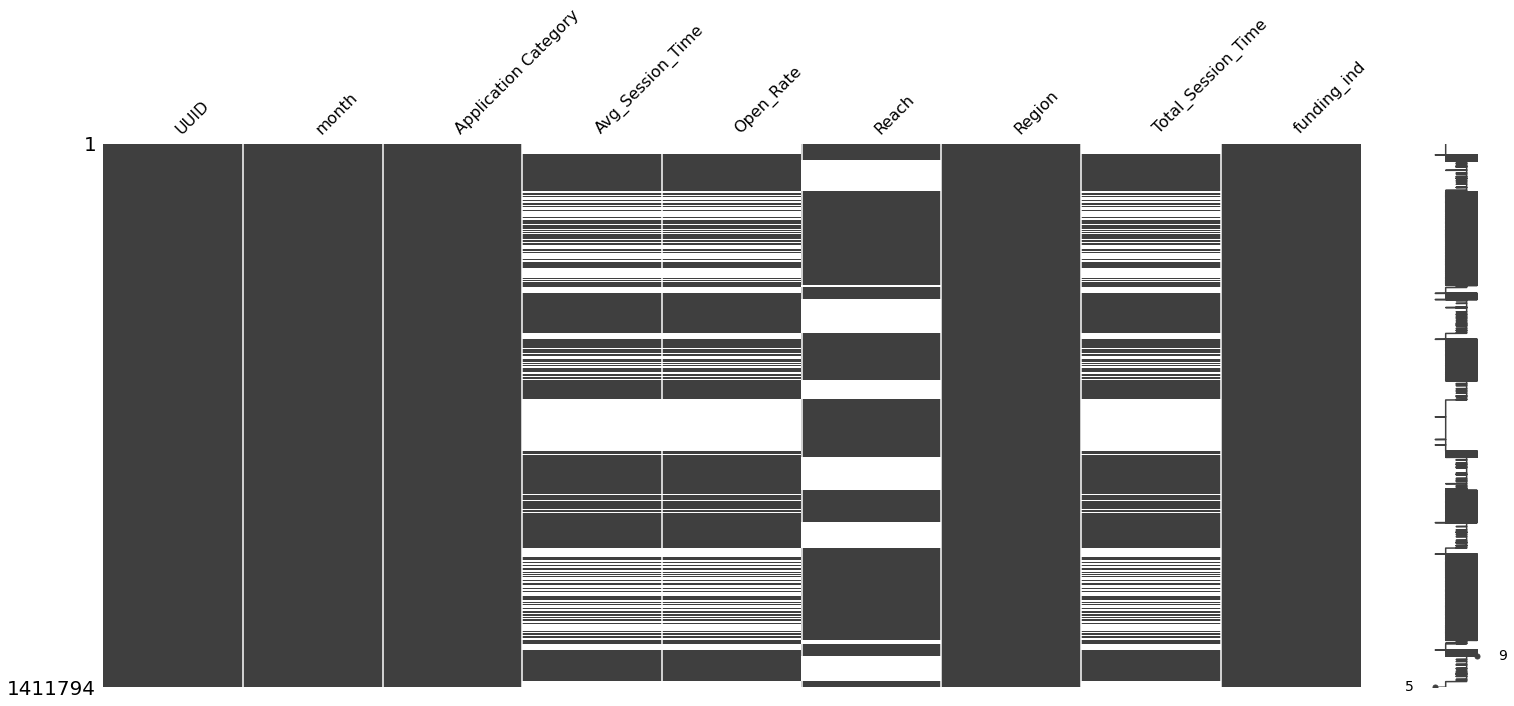

In [ ]:
# Identifying patter in missing values
import missingno as msno
msno.matrix(data)

In [ ]:
data['Year'] = data['month'].apply(lambda x : (int(str(x)[:4])))
data['Month'] = data['month'].apply(lambda x : (int(str(x)[4:6])))
#data['Day'] = data['month'].apply(lambda x : (int(str(x)[6:])))   - All are of 1st day of month

In [ ]:
data.drop(['Region'], axis=1, inplace = True)

In [ ]:
# Subset of funded statups for EDA
Funded = data[data['funding_ind']==1]

In [ ]:
# Subset of Non Funded startups for EDA
Non_funded = data[data['funding_ind']==0]

In [ ]:
# Impute missing values
def fill_missing(dataframe):
  new_data = pd.DataFrame(columns=dataframe.columns)              # First will impute missing values with forward and back fill.
  Category_list = dataframe['Application Category'].value_counts().index.to_list()
  years = dataframe['Year'].value_counts().index.to_list()
  for i in Category_list:
    temp = dataframe[dataframe['Application Category']==i]
    for y in years:
      temp1 = temp[temp['Year']==y]
      temp1.fillna(method='ffill', limit = 2, inplace = True)
      temp1.fillna(method='backfill', limit = 1, inplace = True)
      new_data = pd.concat([new_data, temp1])
  
  new_data_1 = pd.DataFrame(columns=dataframe.columns)            # Remaining imputed with mean of category and year.
  for i in Category_list:
    temp = new_data[new_data['Application Category']==i]
    for y in years:
      temp1 = temp[temp['Year']==y]
      temp1.fillna(temp1.mean(), inplace = True)
      new_data_1 = pd.concat([new_data_1, temp1])

  Final_data = pd.DataFrame(columns=dataframe.columns)            # Still remaining imputed with mean of whole category.
  for i in Category_list:
    temp = new_data_1[new_data_1['Application Category']==i]
    temp.fillna(temp.mean(), inplace = True)
    Final_data = pd.concat([Final_data, temp])

  return Final_data

In [ ]:
# Removing missing values in funded
Funded = fill_missing(Funded)

In [ ]:
# Removing missing values in Non funded
Non_funded = fill_missing(Non_funded)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/

In [ ]:
# Filling rest missing values with overall mean
Funded.fillna(Funded.mean(), inplace = True)

In [ ]:
Final_data = pd.concat([Funded, Non_funded])

In [ ]:
Final_data.shape

(1411794, 10)

In [ ]:
# Saving data sets for future easy use purpose
Final_data.to_csv(working_dir_path + 'Final_dataset.csv', index= False)
Funded.to_csv(working_dir_path + 'Funded_dataset.csv', index= False)
Non_funded.to_csv(working_dir_path + 'Non_funded_dataset.csv', index= False)

# Offset

In [ ]:
Final_df = pd.read_csv(working_dir_path + 'Final_dataset.csv')

In [ ]:
Final_df.shape

(1411794, 10)

In [ ]:
Final_df.drop_duplicates(['UUID', 'month', 'Application Category', 'funding_ind'], inplace = True)

In [ ]:
Final_df.shape

(945184, 10)

In [ ]:
Funded_df = Final_df[Final_df['funding_ind']==1]
Non_funded_df = Final_df[Final_df['funding_ind']==0]

#EDA

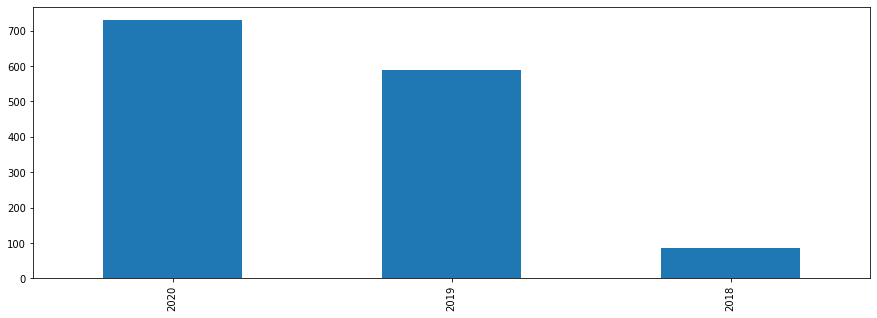

In [ ]:
#Trend of recieving funds
Funded_df['Year'].value_counts().plot(kind='bar')

In [ ]:
# Startups that has never recieved funds
never_funded = list(set(Non_funded_df['Application Category'].value_counts().index.to_list()) - set(Funded_df['Application Category'].value_counts().index.to_list()))
never_funded

['Word',
 'Libraries & Demo',
 'Dating',
 'Art & Design',
 'Events',
 'Casino',
 'Music']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


Text(0.5, 1.0, 'Top 10 categories')

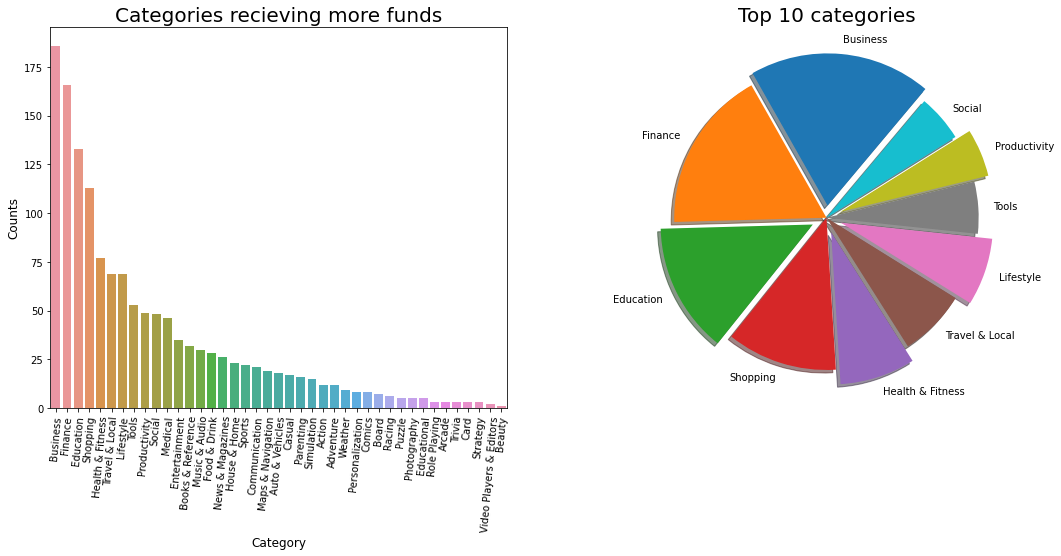

In [ ]:
# Category recieving more funds
plt.rcParams['figure.figsize'] = (18, 7)

a = pd.DataFrame(Funded_df['Application Category'].value_counts())
ax1 = plt.subplot(121)
sns.barplot(x=a.index, y= a['Application Category'] )
plt.xlabel('Category', fontsize = 12)
plt.xticks(rotation=85)
plt.ylabel('Counts', fontsize = 12)
ax1.set_title('Categories recieving more funds', fontsize = 20)

ax2 = plt.subplot(122)
explode =(0.08,0,0.1,0, 0.1,0,0.1,0, 0.1, 0)
plt.pie(a.sort_values(['Application Category'], ascending=False).head(10), labels=a.sort_values(['Application Category'], ascending=False).head(10).index, startangle=50, shadow = True, explode = explode)
ax2.set_title('Top 10 categories', fontsize = 20) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


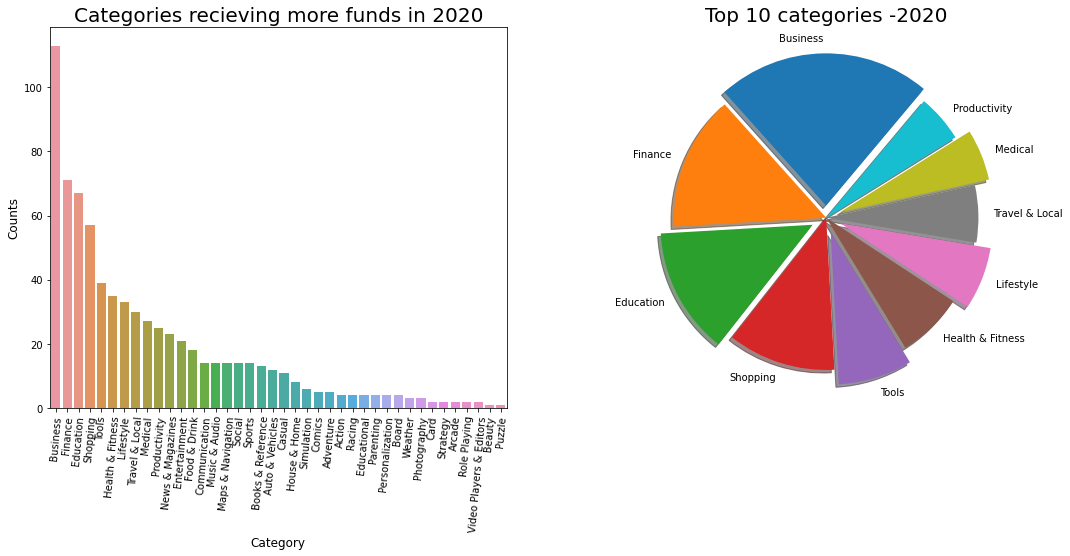

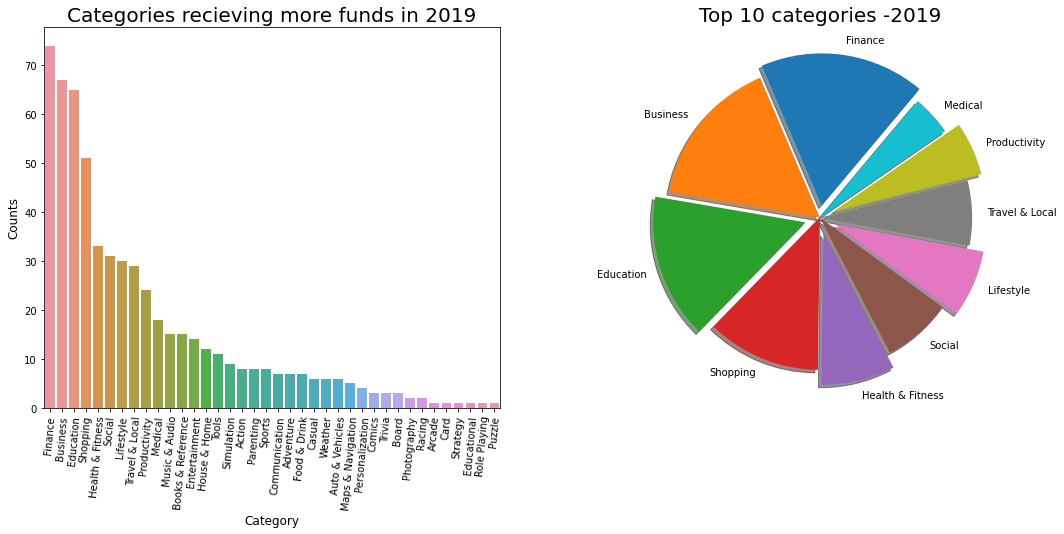

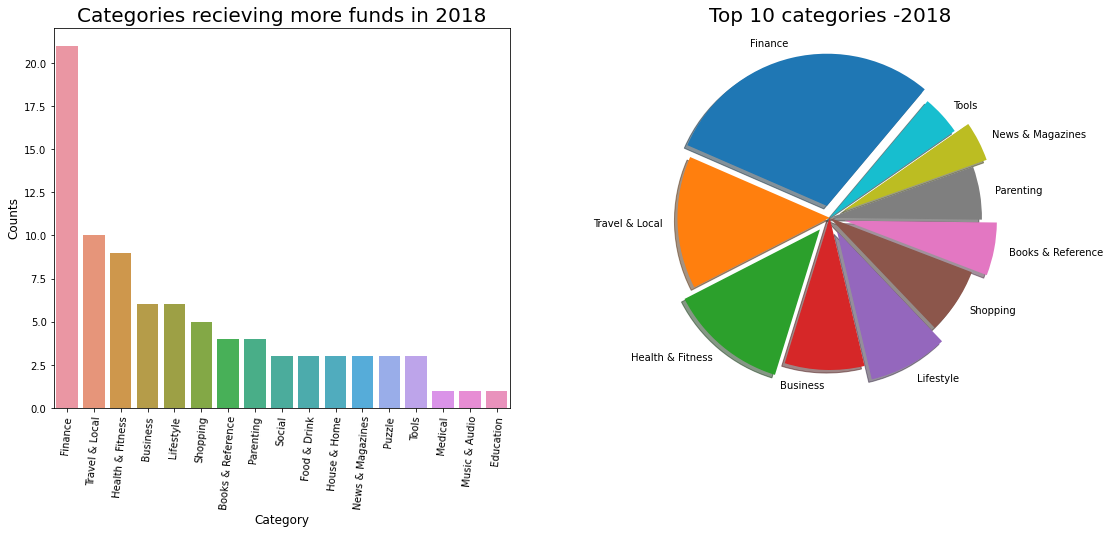

In [ ]:
# Trend of recieving funds over years for each category
years = Funded_df['Year'].value_counts().index.to_list()

plt.rcParams['figure.figsize'] = (18, 7)
for i in years:
  plt.figure()
  temp = Funded_df[Funded_df['Year']==i]
  a = pd.DataFrame(temp['Application Category'].value_counts())
  ax1 = plt.subplot(121)
  sns.barplot(x=a.index, y= a['Application Category'] )
  plt.xlabel('Category', fontsize = 12)
  plt.xticks(rotation=85)
  plt.ylabel('Counts', fontsize = 12)
  ax1.set_title('Categories recieving more funds in '+str(i), fontsize = 20)

  ax2 = plt.subplot(122)
  explode =(0.08,0,0.1,0, 0.1,0,0.1,0, 0.1, 0)
  plt.pie(a.sort_values(['Application Category'], ascending=False).head(10), labels=a.sort_values(['Application Category'], ascending=False).head(10).index, startangle=50, shadow = True, explode = explode)
  ax2.set_title('Top 10 categories -'+str(i), fontsize = 20) 

In [ ]:
# Numerical variables
numerical = ['Avg_Session_Time', 'Open_Rate', 'Reach', 'Total_Session_Time']

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

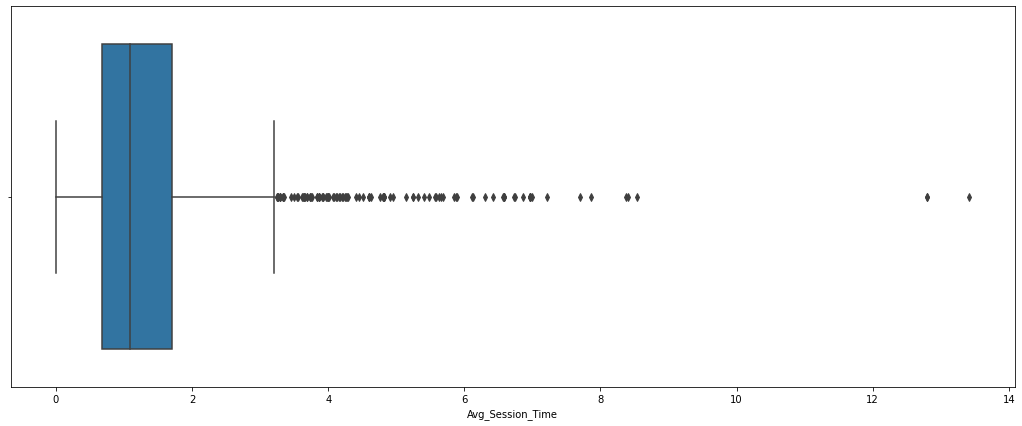

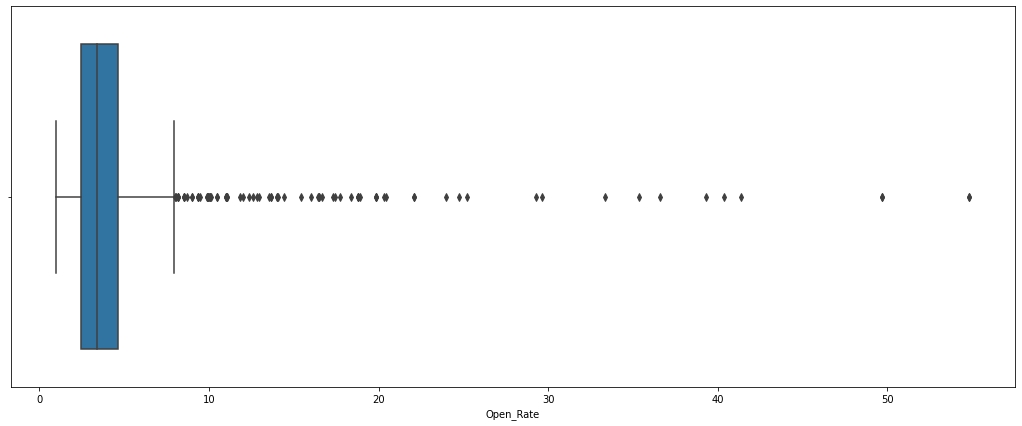

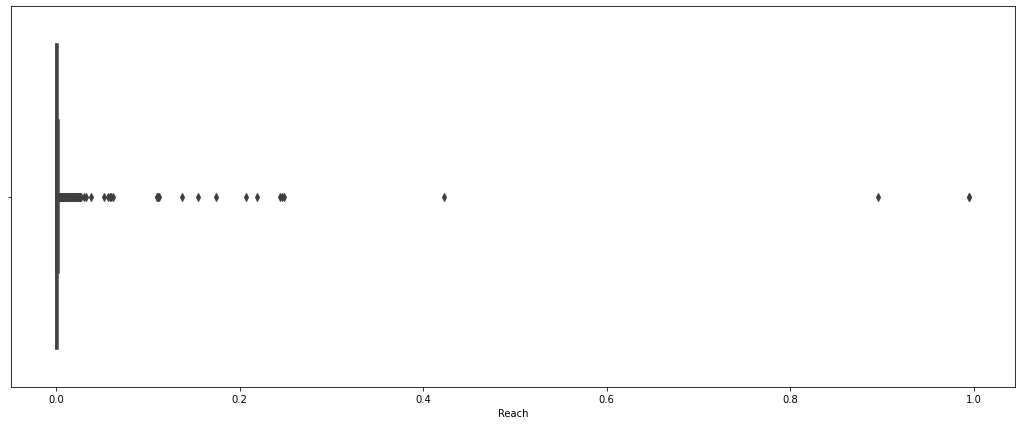

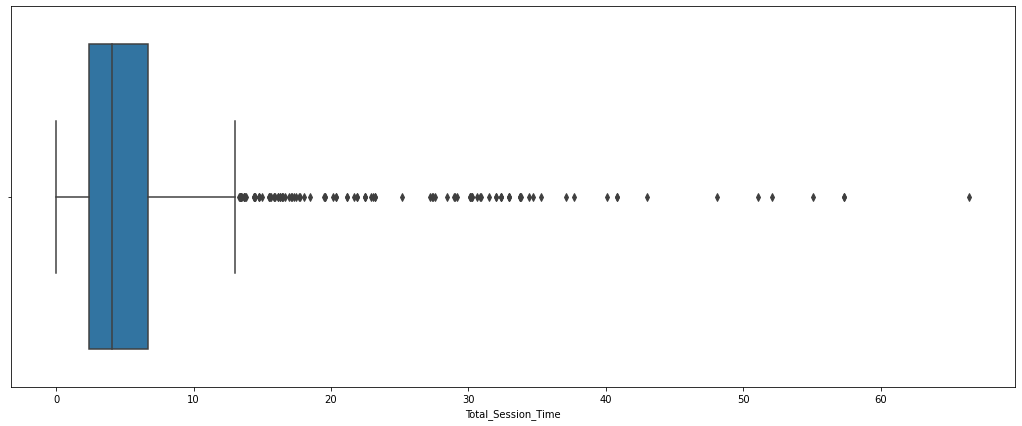

In [ ]:
for i in numerical:
  plt.figure()
  sns.boxplot(Funded_df[i])

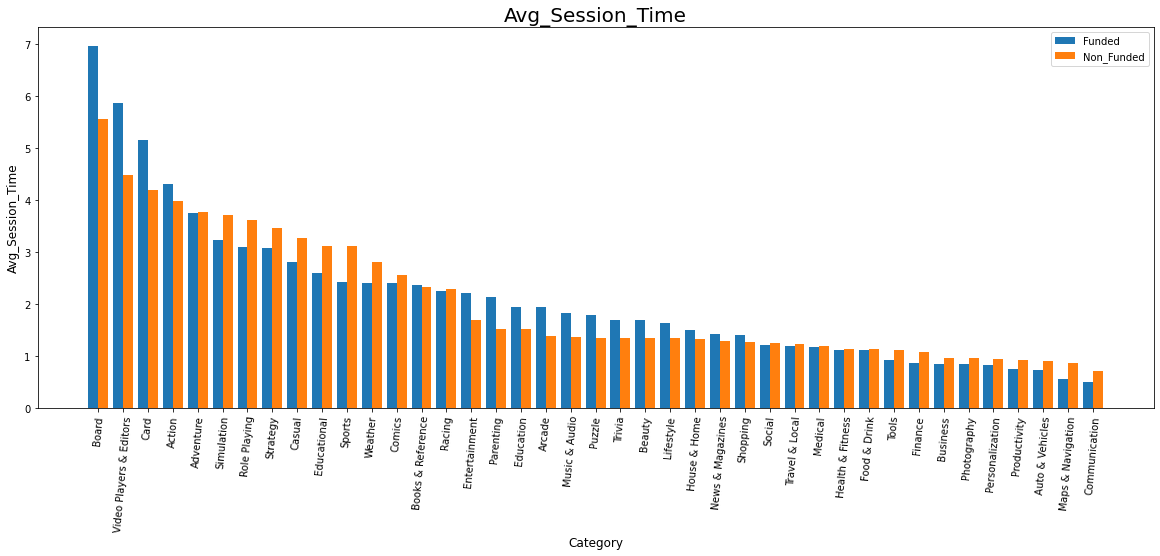

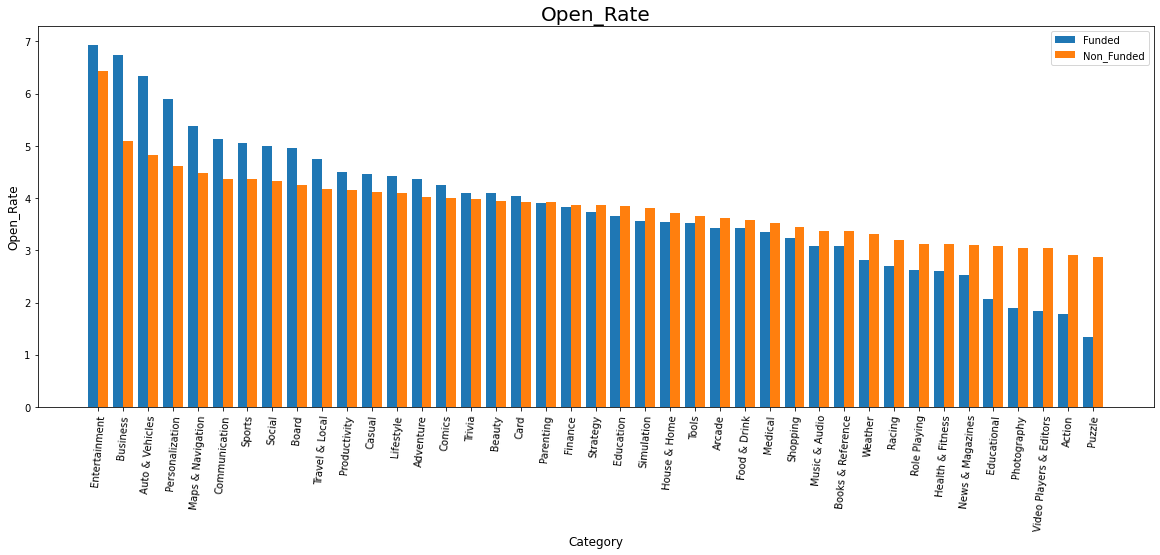

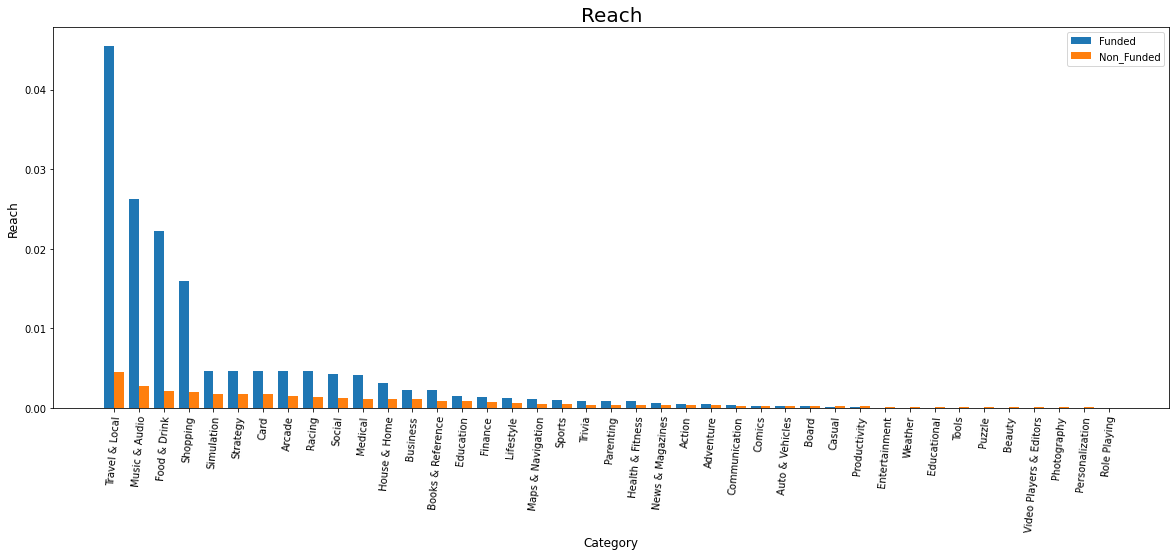

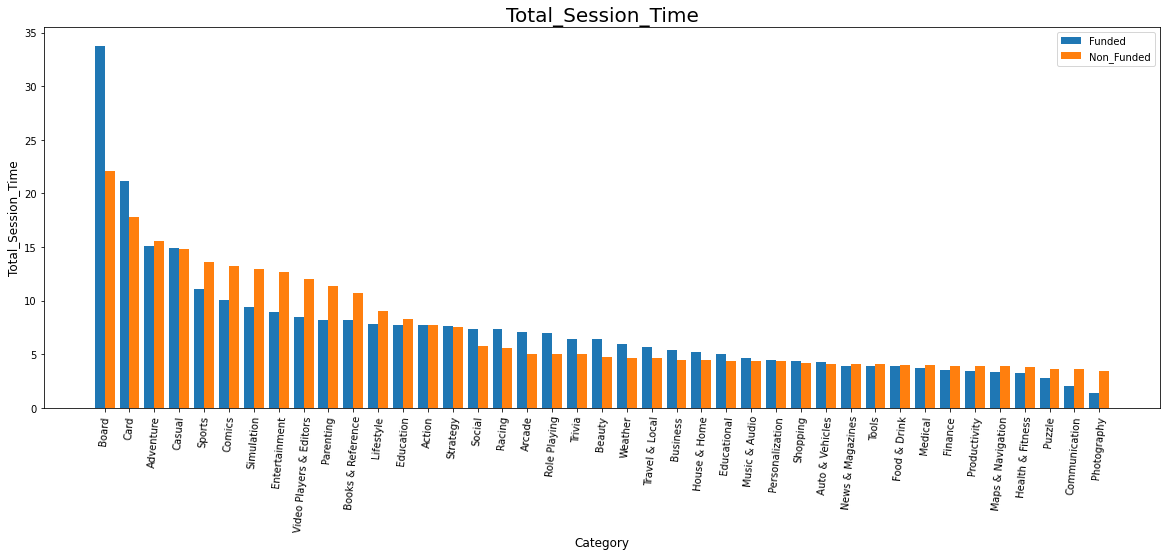

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
for i in numerical:
  w=0.4
  temp = pd.DataFrame(Funded_df.groupby(['Application Category'])[i].mean())
  temp = temp.sort_values([i], ascending=False)
  temp2 = pd.DataFrame(Non_funded_df.groupby(['Application Category'])[i].mean())
  temp2 = temp2.sort_values([i], ascending=False)
  for j in never_funded:
    temp2.drop(j, inplace = True)

  bar1 = np.arange(len(temp.index))
  bar2 = [i+w for i in bar1]

  plt.bar(bar1, temp[i], w, label = 'Funded' )
  plt.bar(bar2, temp2[i], w, label = 'Non_Funded' )

  plt.xlabel('Category', fontsize = 12)
  plt.xticks(bar1+w/2, temp.index, rotation=85)
  plt.ylabel(i, fontsize = 12)
  plt.title(i, fontsize = 20)
  plt.legend()
  plt.show()

Not Funded in 2020 - ['Trivia', 'Word', 'Libraries & Demo', 'Dating', 'Art & Design', 'Events', 'Casino', 'Music']


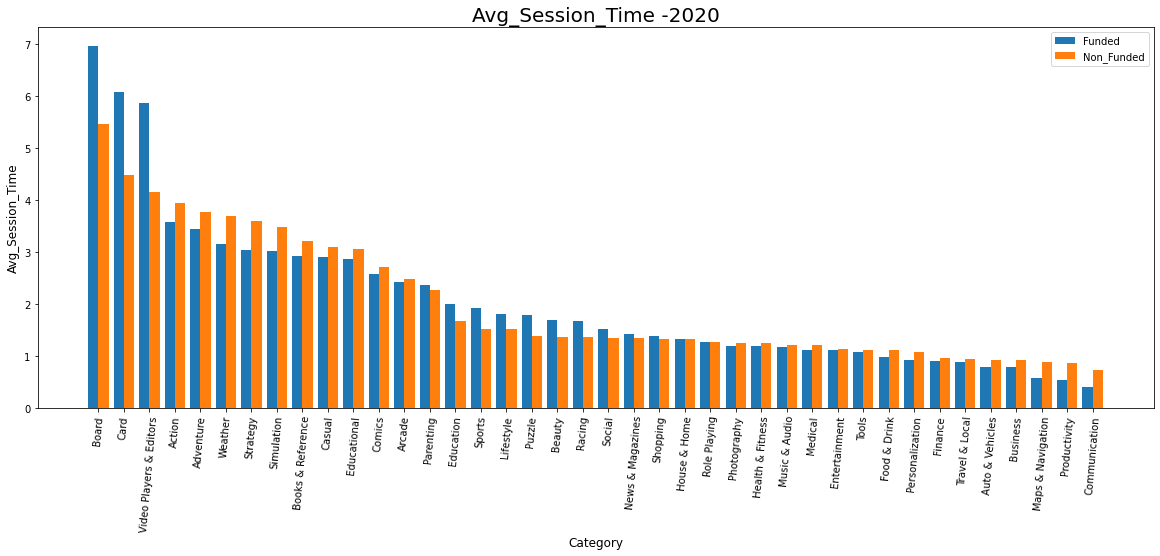

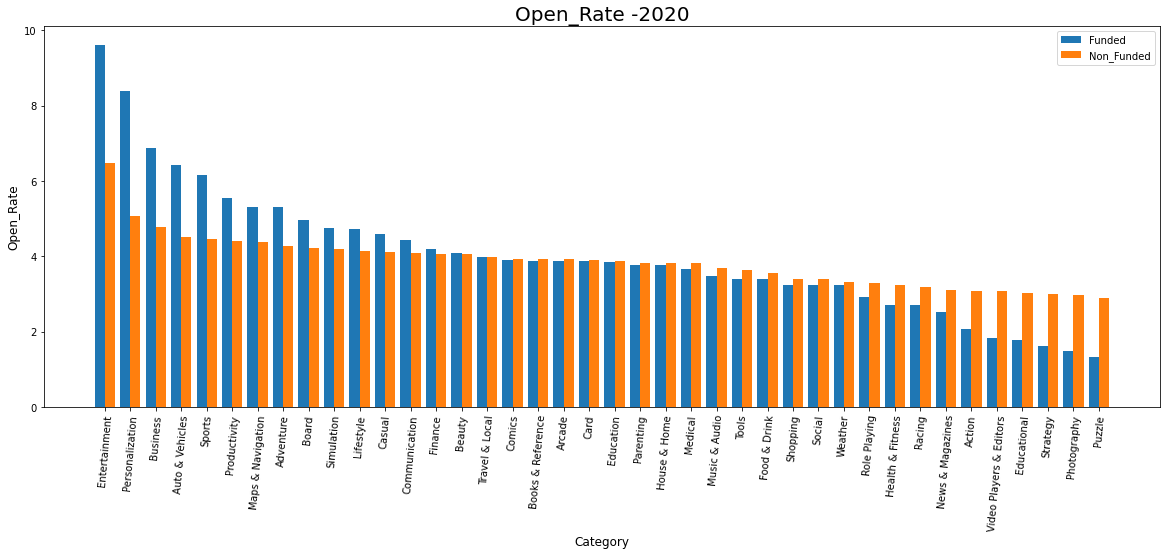

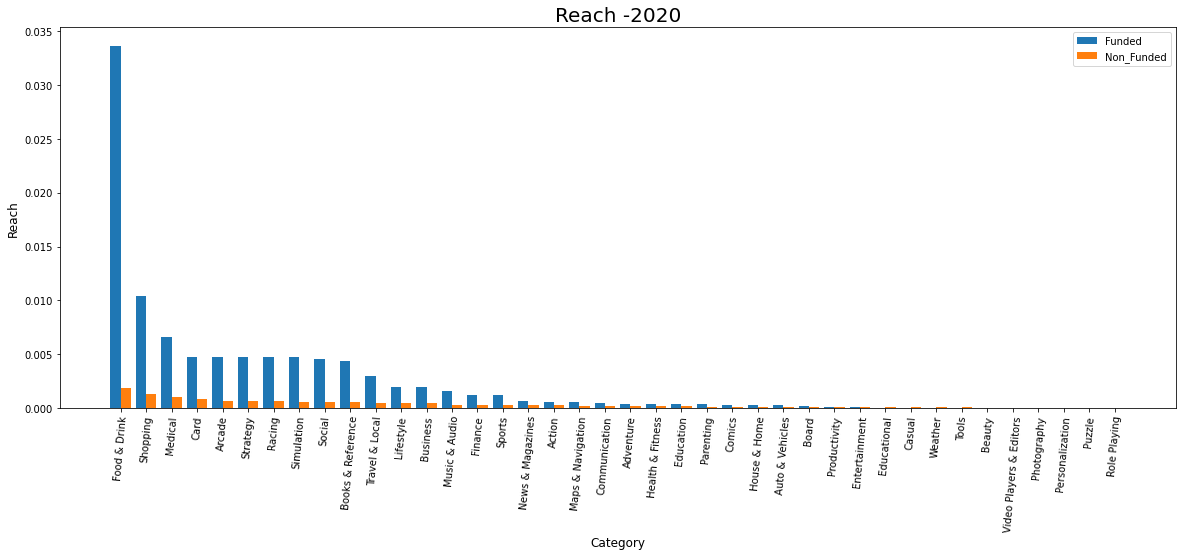

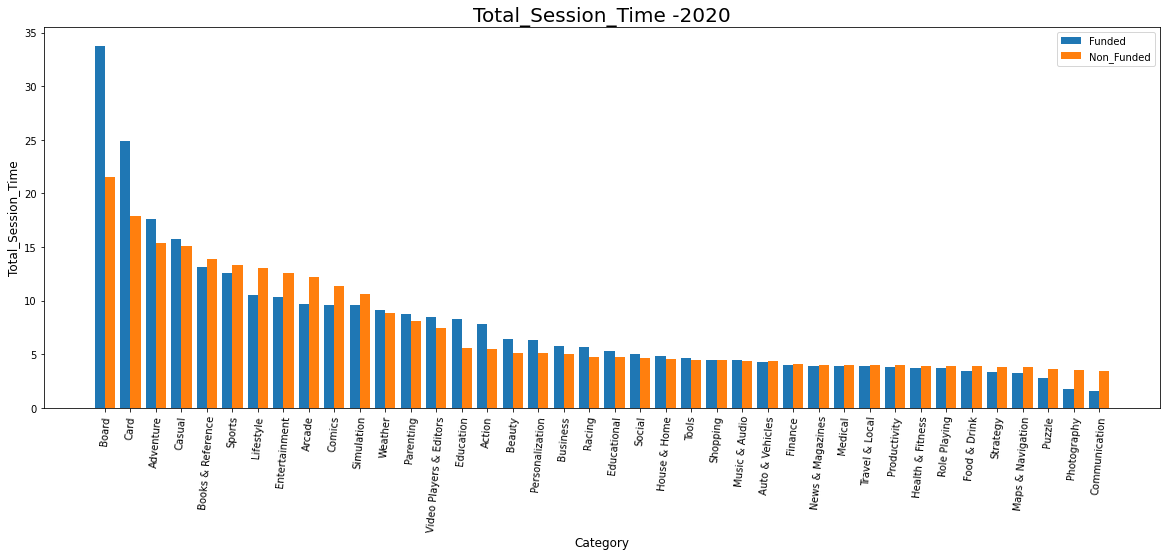

Not Funded in 2019 - ['News & Magazines', 'Beauty', 'Word', 'Libraries & Demo', 'Dating', 'Art & Design', 'Events', 'Casino', 'Music', 'Video Players & Editors']


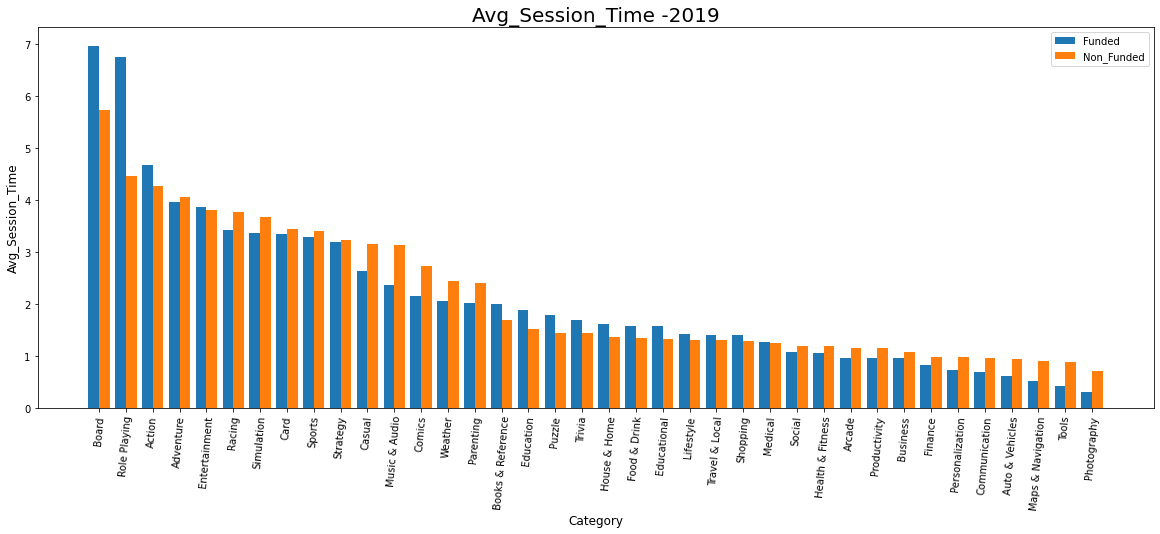

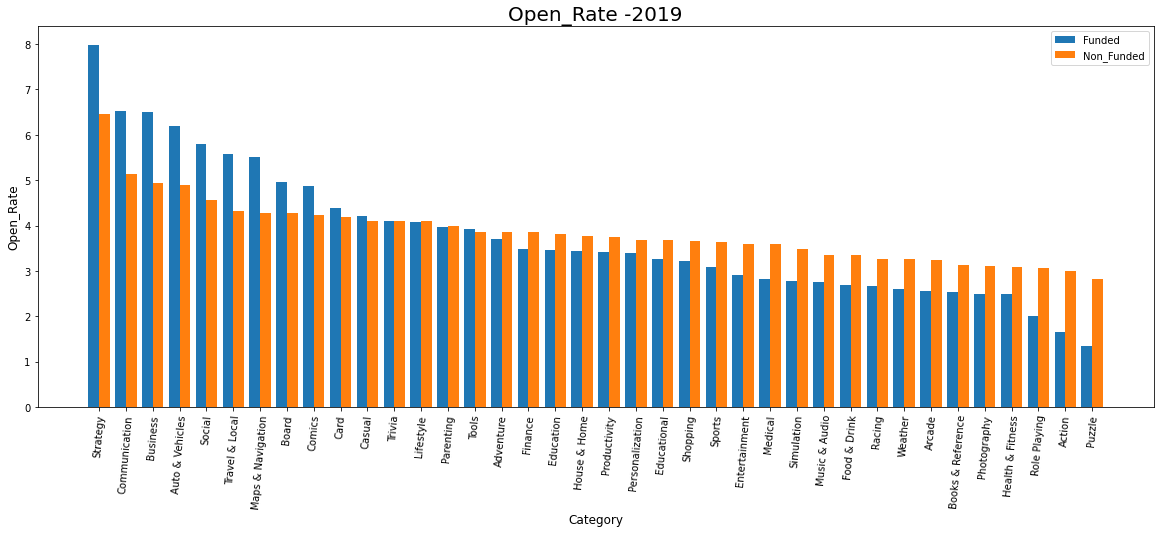

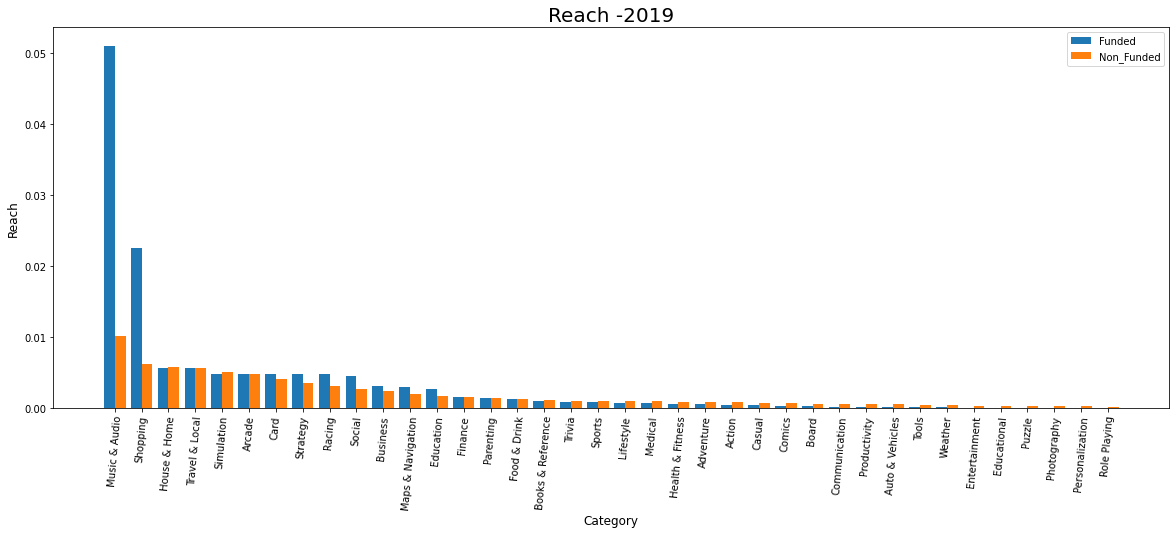

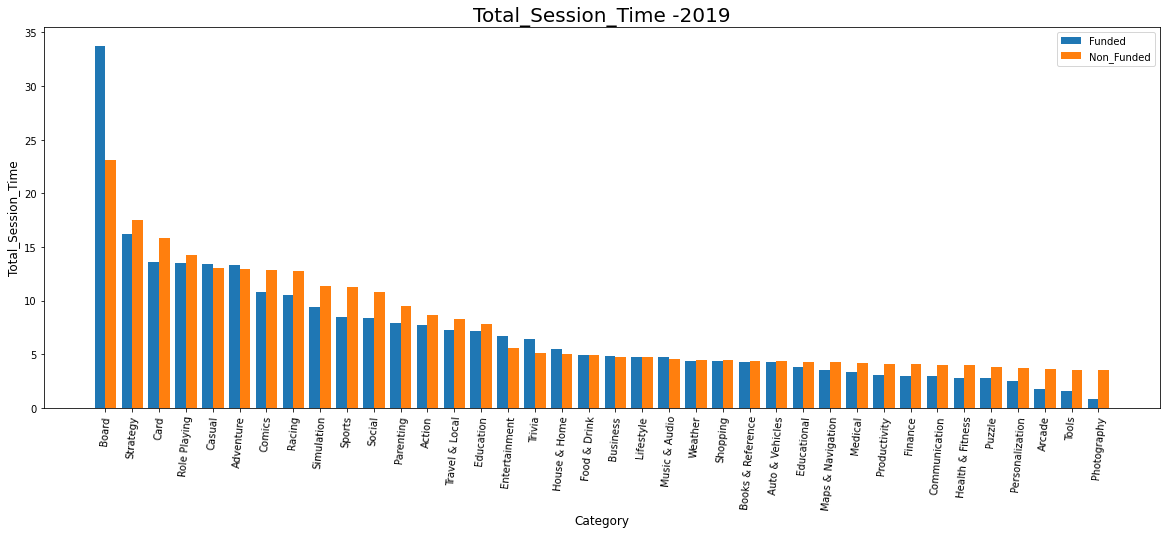

Not Funded in 2018 - ['Entertainment', 'Educational', 'Comics', 'Libraries & Demo', 'Communication', 'Events', 'Personalization', 'Productivity', 'Auto & Vehicles', 'Dating', 'Weather', 'Casino', 'Action', 'Video Players & Editors', 'Role Playing', 'Beauty', 'Art & Design', 'Card', 'Music', 'Racing', 'Sports', 'Simulation', 'Strategy', 'Trivia', 'Board', 'Arcade', 'Maps & Navigation', 'Word', 'Adventure', 'Photography', 'Casual']


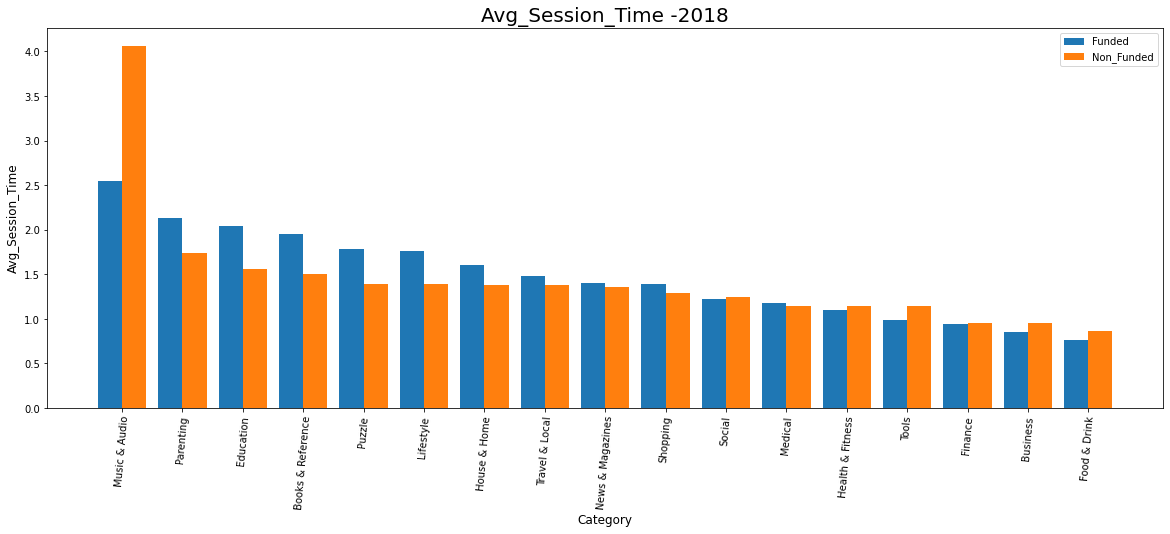

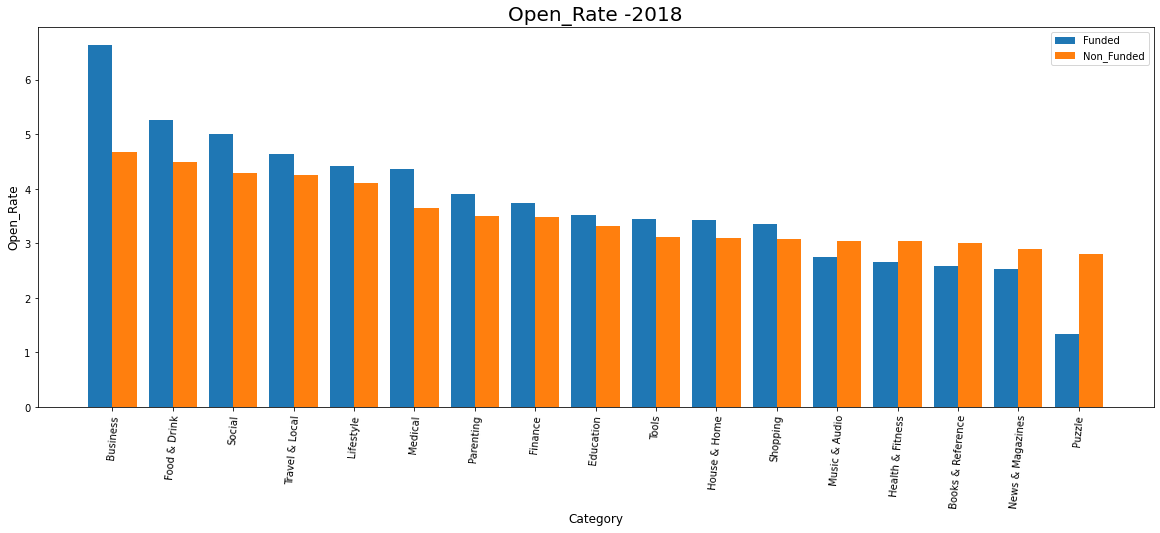

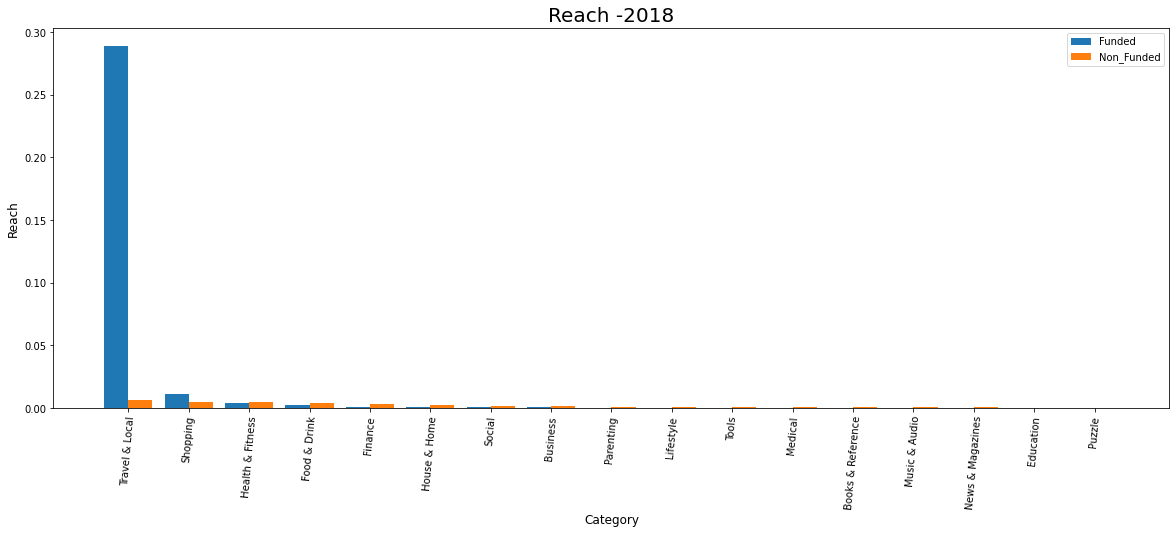

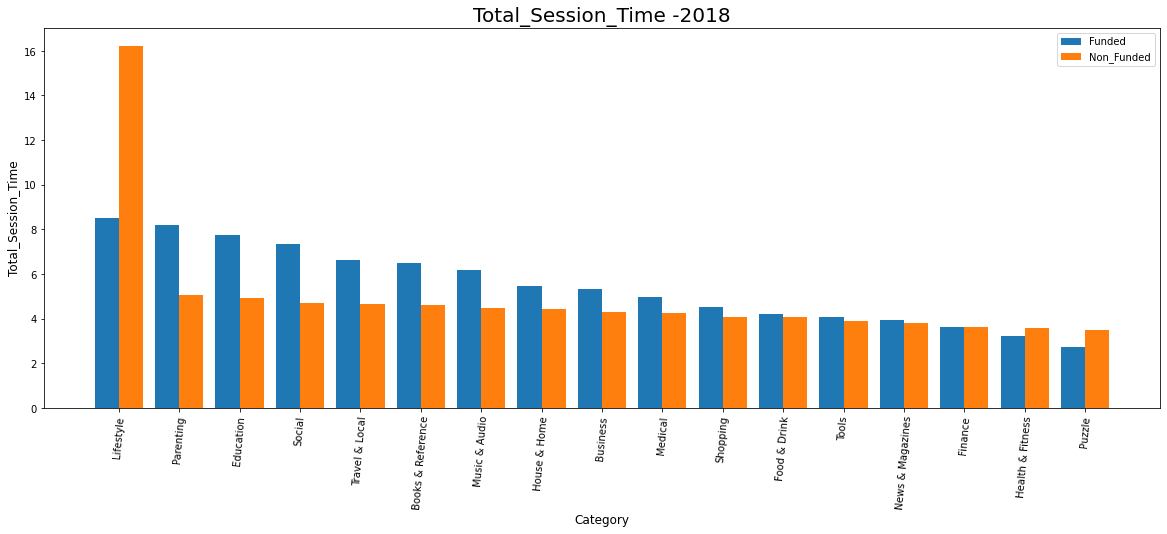

In [ ]:
# Trend for each category year wise
plt.rcParams['figure.figsize'] = (20, 7)

years = Funded_df['Year'].value_counts().index.to_list()
for j in years:
  a1 = Funded_df[Funded_df['Year']==j]
  a2 = Non_funded_df[Non_funded_df['Year']==j]
  not_funded = list(set(a2['Application Category'].value_counts().index.to_list()) - set(a1['Application Category'].value_counts().index.to_list()))
  print('Not Funded in '+str(j)+' -',not_funded)
  for i in numerical:
    w=0.4
    temp = pd.DataFrame(a1.groupby(['Application Category'])[i].mean())
    temp = temp.sort_values([i], ascending=False)
    temp2 = pd.DataFrame(a2.groupby(['Application Category'])[i].mean())
    temp2 = temp2.sort_values([i], ascending=False)
    for k in not_funded:
      temp2.drop(k, inplace = True)

    bar1 = np.arange(len(temp.index))
    bar2 = [i+w for i in bar1]

    plt.bar(bar1, temp[i], w, label = 'Funded' )
    plt.bar(bar2, temp2[i], w, label = 'Non_Funded' )

    plt.xlabel('Category', fontsize = 12)
    plt.xticks(bar1+w/2, temp.index, rotation=85)
    plt.ylabel(i, fontsize = 12)
    plt.title(i +' -'+ str(j), fontsize = 20)
    plt.legend()
    plt.show() 

In [ ]:
# Some UUID have multiple observations for same month, so will be taking mean of that in final dataset.
Funded_df[Funded_df['UUID']=='fd531f493d841c40301e4e0b234ebd2601b7c29d']

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,Year,Month
2235,fd531f493d841c40301e4e0b234ebd2601b7c29d,20200601,Educational,3.737922,1.545455,0.000049,5.595592,1,2020,6
2239,fd531f493d841c40301e4e0b234ebd2601b7c29d,20200501,Educational,2.651596,1.600000,0.000072,2.765850,1,2020,5
2242,fd531f493d841c40301e4e0b234ebd2601b7c29d,20200401,Educational,3.686611,2.250000,0.000043,10.818879,1,2020,4


In [ ]:
# Dropping about 30,000 observations of Category that were never funded.
for i in never_funded:
  Final_df.drop(Final_df[Final_df['Application Category']==i].index, inplace =True)

In [ ]:
Final_df.shape

(924071, 10)

In [ ]:
# Taking only 1 category that has been funded most
a = pd.DataFrame(Funded_df['Application Category'].value_counts())
a = a.sort_values(['Application Category'], ascending=False).head(1)
cat_1 = a.index.to_list()

In [ ]:
cat_1_df = pd.DataFrame(columns = Final_df.columns)
for i in cat_1:
  temp = Final_df[Final_df['Application Category']==i]
  cat_1_df = pd.concat([cat_1_df, temp])

In [ ]:
cat_1_df.shape

(65051, 10)

# Recent Start Ups

In [ ]:
# Startups within last 3 months
a = pd.DataFrame(cat_1_df['UUID'].value_counts())
recent_startups = a[a['UUID']<4].index.to_list()
len(recent_startups)

9423

In [ ]:
# Dropping recent startups
for i in recent_startups:
  cat_1_df.drop(cat_1_df[cat_1_df['UUID']==i].index, inplace =True)

In [ ]:
cat_1_df.shape

(47799, 10)

In [ ]:
cat_1_df.to_csv(working_dir_path + 'category.csv', index= False)

In [ ]:
def Previous_Data(column, dataframe):
  new_data = pd.DataFrame(columns = dataframe.columns)
  Unique_id = dataframe['UUID'].value_counts().index.to_list()

  for i in Unique_id:
    #print(i)
    temp1 = dataframe[dataframe['UUID']==i]
    temp2 = dataframe[dataframe['UUID']==i][['UUID', 'month', column]]
    temp2 = temp2.sort_values(by=['month'])
    temp2.set_index(['UUID', 'month'], inplace = True)
    temp2 = pd.DataFrame(temp2[column].shift(+1))
    temp2.fillna(temp2.mean(), inplace = True)
    temp2.rename(columns={column:column+'_Prev1'}, inplace=True)
    temp2.reset_index(inplace=True)
    temp2.drop(['UUID'], axis = 1, inplace=True)
    new_df = pd.merge(temp1, temp2, on = 'month', how='left')
    new_data = pd.concat([new_data, new_df])
  return new_data

In [ ]:
for i in numerical:
  print(i)
  cat_1_df = Previous_Data(i, cat_1_df)

Avg_Session_Time
Open_Rate
Reach
Total_Session_Time


In [ ]:
cat_1_df.shape

(47799, 14)

In [ ]:
cat_1_df.to_csv(working_dir_path + 'category_prev1.csv', index= False)

In [ ]:
numerical = ['Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1', 'Total_Session_Time_Prev1']

In [ ]:
for i in numerical:
  print(i)
  cat_1_df = Previous_Data(i, cat_1_df)

Avg_Session_Time_Prev1
Open_Rate_Prev1
Reach_Prev1
Total_Session_Time_Prev1


In [ ]:
cat_1_df.shape

(47799, 18)

In [ ]:
cat_1_df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev1_Prev1',
       'Open_Rate_Prev1_Prev1', 'Reach_Prev1_Prev1',
       'Total_Session_Time_Prev1_Prev1'],
      dtype='object')

In [ ]:
cat_1_df.rename(columns={'Avg_Session_Time_Prev1_Prev1':'Avg_Session_Time_Prev2', 'Open_Rate_Prev1_Prev1':'Open_Rate_Prev2', 'Reach_Prev1_Prev1':'Reach_Prev2', 'Total_Session_Time_Prev1_Prev1':'Total_Session_Time_Prev2'}, inplace=True)

In [ ]:
cat_1_df.head(3)

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,Year,Month,Avg_Session_Time_Prev1,Open_Rate_Prev1,Reach_Prev1,Total_Session_Time_Prev1,Avg_Session_Time_Prev2,Open_Rate_Prev2,Reach_Prev2,Total_Session_Time_Prev2
0,443dfb575292203d97a9072def729188cabd66cb,20200301,Business,0.421086,2.000000,1.972088e-07,2.107650,0,2020,3,0.837845,5.100000,0.000111,3.835618,0.804132,3.347267,1.225029e-04,2.265276
1,443dfb575292203d97a9072def729188cabd66cb,20200201,Business,0.837845,5.100000,1.107882e-04,3.835618,0,2020,2,0.804132,3.347267,0.000123,2.265276,0.857583,3.125000,1.277775e-04,2.280761
2,443dfb575292203d97a9072def729188cabd66cb,20200601,Business,0.926343,7.535714,4.889378e-05,6.246904,0,2020,6,0.942628,11.765957,0.000082,9.374886,0.660900,4.500000,3.022203e-07,2.777386


In [ ]:
cat_1_df.to_csv(working_dir_path + 'category_prev2.csv', index= False)

In [ ]:
cat_1_df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2',
       'Reach_Prev2', 'Total_Session_Time_Prev2'],
      dtype='object')

In [ ]:
numerical = ['Avg_Session_Time_Prev2', 'Open_Rate_Prev2', 'Reach_Prev2', 'Total_Session_Time_Prev2']

In [ ]:
# Previos 3rd month data
for i in numerical:
  print(i)
  cat_1_df = Previous_Data(i, cat_1_df)

Avg_Session_Time_Prev2
Open_Rate_Prev2
Reach_Prev2
Total_Session_Time_Prev2


In [ ]:
cat_1_df.shape

(47799, 22)

In [ ]:
cat_1_df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2',
       'Reach_Prev2', 'Total_Session_Time_Prev2',
       'Avg_Session_Time_Prev2_Prev1', 'Open_Rate_Prev2_Prev1',
       'Reach_Prev2_Prev1', 'Total_Session_Time_Prev2_Prev1'],
      dtype='object')

In [ ]:
cat_1_df.rename(columns={'Avg_Session_Time_Prev2_Prev1':'Avg_Session_Time_Prev3', 'Open_Rate_Prev2_Prev1':'Open_Rate_Prev3', 'Reach_Prev2_Prev1':'Reach_Prev3', 'Total_Session_Time_Prev2_Prev1':'Total_Session_Time_Prev3'}, inplace=True)

In [ ]:
cat_1_df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2',
       'Reach_Prev2', 'Total_Session_Time_Prev2', 'Avg_Session_Time_Prev3',
       'Open_Rate_Prev3', 'Reach_Prev3', 'Total_Session_Time_Prev3'],
      dtype='object')

In [ ]:
cat_1_df.to_csv(working_dir_path + 'category_prev3.csv', index= False)

In [ ]:
cat_1_df['month'].max()

20200601

# Dependent Variable

In [ ]:
temp = cat_1_df[['UUID', 'month', 'funding_ind']]
temp.set_index('month', inplace =True)
temp = temp.loc[[20200601, 20200501, 20200401]]
temp.reset_index(inplace= True)
unique_id = temp['UUID'].value_counts().index.to_list()
new = pd.DataFrame(columns=temp.columns)
for i in unique_id:
  temp2 = temp[temp['UUID']==i]
  temp2['Funded'] = np.sum(temp2['funding_ind'])
  new = pd.concat([new, temp2])
new_df = pd.merge(cat_1_df, new, on = ['UUID','month'], how='left')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
new_df.shape

(47799, 24)

In [ ]:
new_df['Funded'].value_counts()

0.0    16026
1.0       51
2.0       44
3.0        6
Name: Funded, dtype: int64

In [ ]:
new_df.fillna(0, inplace =True)

In [ ]:
def dependent(float):
  if float==0:
    return int(0)
  else:
    return int(1)

In [ ]:
new_df['Funded'] = new_df['Funded'].apply(dependent)

In [ ]:
new_df['Funded'].value_counts()

0    47698
1      101
Name: Funded, dtype: int64

In [ ]:
new_df.isna().sum()

UUID                        0
month                       0
Application Category        0
Avg_Session_Time            0
Open_Rate                   0
Reach                       0
Total_Session_Time          0
funding_ind_x               0
Year                        0
Month                       0
Avg_Session_Time_Prev1      0
Open_Rate_Prev1             0
Reach_Prev1                 0
Total_Session_Time_Prev1    0
Avg_Session_Time_Prev2      0
Open_Rate_Prev2             0
Reach_Prev2                 0
Total_Session_Time_Prev2    0
Avg_Session_Time_Prev3      0
Open_Rate_Prev3             0
Reach_Prev3                 0
Total_Session_Time_Prev3    0
funding_ind_y               0
Funded                      0
dtype: int64

In [ ]:
Prepared_data = new_df.copy()

In [ ]:
Prepared_data.head(3)

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind_x,Year,Month,Avg_Session_Time_Prev1,Open_Rate_Prev1,Reach_Prev1,Total_Session_Time_Prev1,Avg_Session_Time_Prev2,Open_Rate_Prev2,Reach_Prev2,Total_Session_Time_Prev2,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,funding_ind_y,Funded
0,ba611c611fbf8a2643e95e82f6e0a831bc62279d,20200301,Business,0.960496,3.720000,0.000025,3.886144,0,2020,3,1.300150,1.000000,0.000036,1.300150,0.295434,1.423077,0.000034,0.535897,2.270223,1.561290,0.000036,3.591688,0,0
1,ba611c611fbf8a2643e95e82f6e0a831bc62279d,20200201,Business,1.300150,1.000000,0.000036,1.300150,0,2020,2,0.295434,1.423077,0.000034,0.535897,2.270223,1.561290,0.000036,3.591688,1.009477,2.714286,0.000038,3.432271,0,0
2,ba611c611fbf8a2643e95e82f6e0a831bc62279d,20200601,Business,1.083513,1.733333,0.000034,1.598234,0,2020,6,0.658679,1.769231,0.000051,1.016458,0.770930,2.166667,0.000017,1.935603,0.960496,3.720000,0.000025,3.886144,0,0


In [ ]:
new_df.to_csv(working_dir_path + 'Prepared1.csv', index= False)

In [ ]:
Prepared_data = pd.read_csv(working_dir_path + 'Prepared1.csv')

In [ ]:
Prepared_data.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind_x', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2',
       'Reach_Prev2', 'Total_Session_Time_Prev2', 'Avg_Session_Time_Prev3',
       'Open_Rate_Prev3', 'Reach_Prev3', 'Total_Session_Time_Prev3',
       'funding_ind_y', 'Funded'],
      dtype='object')

In [ ]:
Prepared_data.head(3)

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind_x,Year,Month,Avg_Session_Time_Prev1,Open_Rate_Prev1,Reach_Prev1,Total_Session_Time_Prev1,Avg_Session_Time_Prev2,Open_Rate_Prev2,Reach_Prev2,Total_Session_Time_Prev2,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,funding_ind_y,Funded
0,ba611c611fbf8a2643e95e82f6e0a831bc62279d,20200301,Business,0.960496,3.720000,0.000025,3.886144,0,2020,3,1.300150,1.000000,0.000036,1.300150,0.295434,1.423077,0.000034,0.535897,2.270223,1.561290,0.000036,3.591688,0,0
1,ba611c611fbf8a2643e95e82f6e0a831bc62279d,20200201,Business,1.300150,1.000000,0.000036,1.300150,0,2020,2,0.295434,1.423077,0.000034,0.535897,2.270223,1.561290,0.000036,3.591688,1.009477,2.714286,0.000038,3.432271,0,0
2,ba611c611fbf8a2643e95e82f6e0a831bc62279d,20200601,Business,1.083513,1.733333,0.000034,1.598234,0,2020,6,0.658679,1.769231,0.000051,1.016458,0.770930,2.166667,0.000017,1.935603,0.960496,3.720000,0.000025,3.886144,0,0


In [ ]:
Prepared_data['Avg_Session_Time_change_3'] = Prepared_data['Avg_Session_Time_Prev3'] - Prepared_data['Avg_Session_Time']
Prepared_data['Avg_Session_Time_change_2'] = Prepared_data['Avg_Session_Time_Prev2'] - Prepared_data['Avg_Session_Time']
Prepared_data['Avg_Session_Time_change_1'] = Prepared_data['Avg_Session_Time_Prev1'] - Prepared_data['Avg_Session_Time']

Prepared_data['Open_Rate_change_3'] = Prepared_data['Open_Rate_Prev3'] - Prepared_data['Open_Rate']
Prepared_data['Open_Rate_change_2'] = Prepared_data['Open_Rate_Prev2'] - Prepared_data['Open_Rate']
Prepared_data['Open_Rate_change_1'] = Prepared_data['Open_Rate_Prev1'] - Prepared_data['Open_Rate']

Prepared_data['Reach_change_3'] = Prepared_data['Reach_Prev3'] - Prepared_data['Reach']
Prepared_data['Reach_change_2'] = Prepared_data['Reach_Prev2'] - Prepared_data['Reach']
Prepared_data['Reach_change_1'] = Prepared_data['Reach_Prev1'] - Prepared_data['Reach']

Prepared_data['Total_Session_Time_change_3'] = Prepared_data['Total_Session_Time_Prev3'] - Prepared_data['Total_Session_Time']
Prepared_data['Total_Session_Time_change_2'] = Prepared_data['Total_Session_Time_Prev2'] - Prepared_data['Total_Session_Time']
Prepared_data['Total_Session_Time_change_1'] = Prepared_data['Total_Session_Time_Prev1'] - Prepared_data['Total_Session_Time']

In [ ]:
Prepared_data.shape

(47799, 36)

In [ ]:
Prepared_data.to_csv(working_dir_path + 'Final_prepared_featured.csv', index=False)

In [ ]:
year_list = list(set(Prepared_data['month'].value_counts().index.to_list()) - set([20200601, 20200501, 20200401]))

In [ ]:
Prepared_data.head()

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind_x,Year,Month,Avg_Session_Time_Prev1,Open_Rate_Prev1,Reach_Prev1,Total_Session_Time_Prev1,Avg_Session_Time_Prev2,Open_Rate_Prev2,Reach_Prev2,Total_Session_Time_Prev2,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,funding_ind_y,Funded,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1
0,ba611c611fbf8a2643e95e82f6e0a831bc62279d,20200301,Business,0.960496,3.720000,0.000025,3.886144,0,2020,3,1.300150,1.000000,0.000036,1.300150,0.295434,1.423077,0.000034,0.535897,2.270223,1.561290,0.000036,3.591688,0,0,1.309726,-0.665062,0.339654,-2.158710,-2.296923,-2.720000,0.000011,9.180263e-06,0.000011,-0.294456,-3.350247,-2.585994
1,ba611c611fbf8a2643e95e82f6e0a831bc62279d,20200201,Business,1.300150,1.000000,0.000036,1.300150,0,2020,2,0.295434,1.423077,0.000034,0.535897,2.270223,1.561290,0.000036,3.591688,1.009477,2.714286,0.000038,3.432271,0,0,-0.290673,0.970073,-1.004716,1.714286,0.561290,0.423077,0.000002,3.917263e-07,-0.000002,2.132121,2.291538,-0.764253
2,ba611c611fbf8a2643e95e82f6e0a831bc62279d,20200601,Business,1.083513,1.733333,0.000034,1.598234,0,2020,6,0.658679,1.769231,0.000051,1.016458,0.770930,2.166667,0.000017,1.935603,0.960496,3.720000,0.000025,3.886144,0,0,-0.123017,-0.312583,-0.424834,1.986667,0.433333,0.035897,-0.000009,-1.760353e-05,0.000017,2.287910,0.337368,-0.581777
3,ba611c611fbf8a2643e95e82f6e0a831bc62279d,20200101,Business,0.295434,1.423077,0.000034,0.535897,0,2020,1,2.270223,1.561290,0.000036,3.591688,1.009477,2.714286,0.000038,3.432271,0.975511,4.991454,0.000042,4.925617,0,0,0.680077,0.714043,1.974788,3.568377,1.291209,0.138213,0.000008,3.902476e-06,0.000002,4.389720,2.896374,3.055790
4,ba611c611fbf8a2643e95e82f6e0a831bc62279d,20200501,Business,0.658679,1.769231,0.000051,1.016458,0,2020,5,0.770930,2.166667,0.000017,1.935603,0.960496,3.720000,0.000025,3.886144,1.300150,1.000000,0.000036,1.300150,0,0,0.641471,0.301817,0.112251,-0.769231,1.950769,0.397436,-0.000015,-2.622525e-05,-0.000034,0.283692,2.869686,0.919145


In [ ]:
# Times Funded Previously
temp = Prepared_data[['UUID', 'month', 'funding_ind_x']]
temp.set_index('month', inplace =True)
temp = temp.loc[year_list]
temp.reset_index(inplace= True)
unique_id = temp['UUID'].value_counts().index.to_list()
new = pd.DataFrame(columns=temp.columns)
for i in unique_id:
  temp2 = temp[temp['UUID']==i]
  temp2['Times_Funded'] = np.sum(temp2['funding_ind_x'])
  new = pd.concat([new, temp2])
new_df = pd.merge(Prepared_data, new, on = ['UUID','month'], how='left')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
new_df.head(3)

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind_x_x,Year,Month,Avg_Session_Time_Prev1,Open_Rate_Prev1,Reach_Prev1,Total_Session_Time_Prev1,Avg_Session_Time_Prev2,Open_Rate_Prev2,Reach_Prev2,Total_Session_Time_Prev2,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,funding_ind_y,Funded,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1,funding_ind_x_y,Times_Funded
0,ba611c611fbf8a2643e95e82f6e0a831bc62279d,20200301,Business,0.960496,3.720000,0.000025,3.886144,0,2020,3,1.300150,1.000000,0.000036,1.300150,0.295434,1.423077,0.000034,0.535897,2.270223,1.561290,0.000036,3.591688,0,0,1.309726,-0.665062,0.339654,-2.158710,-2.296923,-2.720000,0.000011,9.180263e-06,0.000011,-0.294456,-3.350247,-2.585994,0,0.0
1,ba611c611fbf8a2643e95e82f6e0a831bc62279d,20200201,Business,1.300150,1.000000,0.000036,1.300150,0,2020,2,0.295434,1.423077,0.000034,0.535897,2.270223,1.561290,0.000036,3.591688,1.009477,2.714286,0.000038,3.432271,0,0,-0.290673,0.970073,-1.004716,1.714286,0.561290,0.423077,0.000002,3.917263e-07,-0.000002,2.132121,2.291538,-0.764253,0,0.0
2,ba611c611fbf8a2643e95e82f6e0a831bc62279d,20200601,Business,1.083513,1.733333,0.000034,1.598234,0,2020,6,0.658679,1.769231,0.000051,1.016458,0.770930,2.166667,0.000017,1.935603,0.960496,3.720000,0.000025,3.886144,0,0,-0.123017,-0.312583,-0.424834,1.986667,0.433333,0.035897,-0.000009,-1.760353e-05,0.000017,2.287910,0.337368,-0.581777,NaN,NaN


In [ ]:
new_df['Times_Funded'].value_counts()

0.0    31043
3.0      481
2.0       83
1.0       65
Name: Times_Funded, dtype: int64

In [ ]:
new_df.drop(['UUID', 'month', 'Application Category', 'Avg_Session_Time', 'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind_x_x', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1','Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2', 'Reach_Prev2', 'Total_Session_Time_Prev2', 'funding_ind_y', 'funding_ind_x_y'],axis=1, inplace=True)

In [ ]:
new_df.fillna(0, inplace =True)

In [ ]:
new_df.drop(['Year', 'Month'], axis = 1, inplace=True)

In [ ]:
new_df.to_csv(working_dir_path + 'Final_prepared_features.csv', index=False)

# Model Building

# New Approach

In [ ]:
Final_df = pd.read_csv(working_dir_path + 'Final_dataset.csv')

In [ ]:
Final_df.shape

(1411794, 10)

In [ ]:
Final_df.drop_duplicates(['UUID', 'month', 'Application Category', 'funding_ind'], inplace = True)

In [ ]:
Final_df.shape

(945184, 10)

In [ ]:
Funded_df = Final_df[Final_df['funding_ind']==1]
Non_funded_df = Final_df[Final_df['funding_ind']==0]

In [ ]:
# Startups that has never recieved funds
never_funded = list(set(Non_funded_df['Application Category'].value_counts().index.to_list()) - set(Funded_df['Application Category'].value_counts().index.to_list()))
never_funded

['Word',
 'Libraries & Demo',
 'Dating',
 'Art & Design',
 'Events',
 'Casino',
 'Music']

In [ ]:
# Numerical variables
numerical = ['Avg_Session_Time', 'Open_Rate', 'Reach', 'Total_Session_Time']

In [ ]:
for i in never_funded:
  Final_df.drop(Final_df[Final_df['Application Category']==i].index, inplace =True)

In [ ]:
Final_df.shape

(924071, 10)

In [ ]:
# Startups within last 3 months
a = pd.DataFrame(Final_df['UUID'].value_counts())
recent_startups = a[a['UUID']<4].index.to_list()
len(recent_startups)

72541

In [ ]:
Final_df.set_index('UUID', inplace=True)

In [ ]:
# Dropping recent startups
Final_df.drop(recent_startups, inplace=True)

In [ ]:
Final_df.shape

(790065, 9)

# Feature Engg

In [ ]:
Final_df.reset_index(inplace = True)

In [ ]:
Final_df.head(3)

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,Year,Month
0,7dfc5be8e09477caf982fa639f9b50dd3ad70137,20200301,Education,1.358175,1.000000,3.352550e-06,1.358175,1,2020,3
1,548713f9e68f69baa229200151c0ed53735961ff,20200301,Education,3.251425,4.000000,1.972088e-07,13.005700,1,2020,3
2,e1e00691667ef2640f2aa7bcc867cda73cd31f15,20200301,Education,2.716045,6.909868,2.997574e-04,18.437022,1,2020,3


In [ ]:
Final_df.sort_values(by=['UUID','month'], inplace = True)

In [ ]:
Final_df.shape

(790065, 10)

In [ ]:
for i in numerical:
  Final_df[i+'_Prev1'] = Final_df.groupby('UUID')[i].shift(+1)

In [ ]:
Final_df.shape

(790065, 14)

In [ ]:
numerical = ['Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1', 'Total_Session_Time_Prev1']

In [ ]:
for i in numerical:
  Final_df[i+'_Prev2'] = Final_df.groupby('UUID')[i].shift(+1)

In [ ]:
Final_df.shape

(790065, 18)

In [ ]:
numerical = ['Avg_Session_Time_Prev1_Prev2', 'Open_Rate_Prev1_Prev2', 'Reach_Prev1_Prev2', 'Total_Session_Time_Prev1_Prev2']

In [ ]:
for i in numerical:
  Final_df[i+'_Prev3'] = Final_df.groupby('UUID')[i].shift(+1)

In [ ]:
Final_df.shape

(790065, 22)

In [ ]:
Final_df.head(3)

,UUID,month,Application Category,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,Year,Month,Avg_Session_Time_Prev1,Open_Rate_Prev1,Reach_Prev1,Total_Session_Time_Prev1,Avg_Session_Time_Prev1_Prev2,Open_Rate_Prev1_Prev2,Reach_Prev1_Prev2,Total_Session_Time_Prev1_Prev2,Avg_Session_Time_Prev1_Prev2_Prev3,Open_Rate_Prev1_Prev2_Prev3,Reach_Prev1_Prev2_Prev3,Total_Session_Time_Prev1_Prev2_Prev3
481981,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,20200201,Social,1.471044,3.000000,9.636929e-04,4.413133,0,2020,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479116,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,20200301,Social,2.009374,2.649485,2.366506e-06,6.889997,0,2020,3,1.471044,3.000000,0.000964,4.413133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
492232,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,20200401,Social,1.652607,5.708333,9.066608e-07,10.578173,0,2020,4,2.009374,2.649485,0.000002,6.889997,1.471044,3.0,0.000964,4.413133,NaN,NaN,NaN,NaN


In [ ]:
Final_df.shape

(790065, 22)

In [ ]:
Final_df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev1_Prev2',
       'Open_Rate_Prev1_Prev2', 'Reach_Prev1_Prev2',
       'Total_Session_Time_Prev1_Prev2', 'Avg_Session_Time_Prev1_Prev2_Prev3',
       'Open_Rate_Prev1_Prev2_Prev3', 'Reach_Prev1_Prev2_Prev3',
       'Total_Session_Time_Prev1_Prev2_Prev3'],
      dtype='object')

In [ ]:
Final_df.rename(columns={'Avg_Session_Time_Prev1_Prev2':'Avg_Session_Time_Prev2', 'Open_Rate_Prev1_Prev2':'Open_Rate_Prev2', 'Reach_Prev1_Prev2':'Reach_Prev2', 'Total_Session_Time_Prev1_Prev2':'Total_Session_Time_Prev2',      'Avg_Session_Time_Prev1_Prev2_Prev3':'Avg_Session_Time_Prev3', 'Open_Rate_Prev1_Prev2_Prev3':'Open_Rate_Prev3', 'Reach_Prev1_Prev2_Prev3':'Reach_Prev3', 'Total_Session_Time_Prev1_Prev2_Prev3':'Total_Session_Time_Prev3'}, inplace=True)

In [ ]:
Final_df.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2',
       'Reach_Prev2', 'Total_Session_Time_Prev2', 'Avg_Session_Time_Prev3',
       'Open_Rate_Prev3', 'Reach_Prev3', 'Total_Session_Time_Prev3'],
      dtype='object')

In [ ]:
len(Final_df['UUID'].value_counts().index)

72648

In [ ]:
Final_df.shape

(790065, 22)

In [ ]:
Final_df.isna().sum()

UUID                             0
month                            0
Application Category             0
Avg_Session_Time                 0
Open_Rate                        0
Reach                            0
Total_Session_Time               0
funding_ind                      0
Year                             0
Month                            0
Avg_Session_Time_Prev1       72648
Open_Rate_Prev1              72648
Reach_Prev1                  72648
Total_Session_Time_Prev1     72648
Avg_Session_Time_Prev2      145296
Open_Rate_Prev2             145296
Reach_Prev2                 145296
Total_Session_Time_Prev2    145296
Avg_Session_Time_Prev3      217944
Open_Rate_Prev3             217944
Reach_Prev3                 217944
Total_Session_Time_Prev3    217944
dtype: int64

In [ ]:
Final_df.fillna(0, inplace= True)

# Copy Data Set

In [ ]:
Final_df2 = Final_df.copy()

In [ ]:
Final_df2.shape

(790065, 22)

# Dependent Variable

In [ ]:
temp = Final_df[['UUID', 'Application Category', 'month', 'funding_ind']]
temp.set_index('month', inplace =True)
temp = temp.loc[[20200601, 20200501, 20200401]]
temp.reset_index(inplace= True)
temp.set_index(['UUID','Application Category'], inplace = True)
temp2 = temp.groupby(['UUID','Application Category']).sum()
temp2.drop('month', axis = 1, inplace = True)
temp2.rename(columns={'funding_ind':'Funded'}, inplace = True)
temp = pd.merge(temp, temp2, on=['UUID','Application Category'], how='left')
temp.drop(['funding_ind'], axis = 1, inplace=True)
temp.reset_index(inplace=True)
Final_df2 = pd.merge(Final_df2, temp, on=['UUID', 'Application Category','month'], how='left')

In [ ]:
Final_df2.shape

(790065, 23)

In [ ]:
Final_df2.columns

Index(['UUID', 'month', 'Application Category', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2',
       'Reach_Prev2', 'Total_Session_Time_Prev2', 'Avg_Session_Time_Prev3',
       'Open_Rate_Prev3', 'Reach_Prev3', 'Total_Session_Time_Prev3', 'Funded'],
      dtype='object')

In [ ]:
Final_df2.isna().sum()

UUID                             0
month                            0
Application Category             0
Avg_Session_Time                 0
Open_Rate                        0
Reach                            0
Total_Session_Time               0
funding_ind                      0
Year                             0
Month                            0
Avg_Session_Time_Prev1           0
Open_Rate_Prev1                  0
Reach_Prev1                      0
Total_Session_Time_Prev1         0
Avg_Session_Time_Prev2           0
Open_Rate_Prev2                  0
Reach_Prev2                      0
Total_Session_Time_Prev2         0
Avg_Session_Time_Prev3           0
Open_Rate_Prev3                  0
Reach_Prev3                      0
Total_Session_Time_Prev3         0
Funded                      518212
dtype: int64

# COPY2

In [ ]:
Final_df3 = Final_df2.copy()

In [ ]:
Final_df2.shape

(790065, 23)

In [ ]:
Final_df3['Avg_Session_Time_change_3'] = Final_df3['Avg_Session_Time_Prev3'] - Final_df3['Avg_Session_Time']
Final_df3['Avg_Session_Time_change_2'] = Final_df3['Avg_Session_Time_Prev2'] - Final_df3['Avg_Session_Time']
Final_df3['Avg_Session_Time_change_1'] = Final_df3['Avg_Session_Time_Prev1'] - Final_df3['Avg_Session_Time']

Final_df3['Open_Rate_change_3'] = Final_df3['Open_Rate_Prev3'] - Final_df3['Open_Rate']
Final_df3['Open_Rate_change_2'] = Final_df3['Open_Rate_Prev2'] - Final_df3['Open_Rate']
Final_df3['Open_Rate_change_1'] = Final_df3['Open_Rate_Prev1'] - Final_df3['Open_Rate']

Final_df3['Reach_change_3'] = Final_df3['Reach_Prev3'] - Final_df3['Reach']
Final_df3['Reach_change_2'] = Final_df3['Reach_Prev2'] - Final_df3['Reach']
Final_df3['Reach_change_1'] = Final_df3['Reach_Prev1'] - Final_df3['Reach']

Final_df3['Total_Session_Time_change_3'] = Final_df3['Total_Session_Time_Prev3'] - Final_df3['Total_Session_Time']
Final_df3['Total_Session_Time_change_2'] = Final_df3['Total_Session_Time_Prev2'] - Final_df3['Total_Session_Time']
Final_df3['Total_Session_Time_change_1'] = Final_df3['Total_Session_Time_Prev1'] - Final_df3['Total_Session_Time']

In [ ]:
Final_df3.shape

(790065, 35)

In [ ]:
year_list = list(set(Final_df3['month'].value_counts().index.to_list()) - set([20200601, 20200501, 20200401]))

#PREVIOUSLY FUNDED

In [ ]:
# Times Funded Previously
temp = Final_df3[['UUID', 'Application Category', 'month', 'funding_ind']]
temp.set_index('month', inplace =True)
temp = temp.loc[year_list]
temp.reset_index(inplace= True)
temp.set_index(['UUID','Application Category'], inplace = True)
temp2 = temp.groupby(['UUID','Application Category']).sum()
temp2.drop('month', axis = 1, inplace = True)
temp2.rename(columns={'funding_ind':'Times_Funded_prev'}, inplace = True)
temp2.reset_index(inplace=True)
Prev_Funded = temp2.copy()

In [ ]:
Prev_Funded.head(3)

,UUID,Application Category,Times_Funded_prev
0,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,0
1,0001ef9403a3bb9d7d673d10b5d082a536acaa0a,Medical,0
2,00033006be474a18f422eb285da9b761023b09e1,Entertainment,0


# INVESTOR INTEREST

In [ ]:
temp = Final_df3[['Application Category', 'funding_ind']]
temp = temp.groupby(['Application Category']).sum()
temp['Investor_Interest'] = (temp['funding_ind']/len(temp))*100
temp.drop(['funding_ind'], axis=1, inplace=True)
Investor_Interest = temp.copy()

In [ ]:
Investor_Interest.head(3)

,Investor_Interest
Application Category,
Action,29.268293
Adventure,29.268293
Arcade,7.317073


#Months_ACTIVE

In [ ]:
#Total Months
temp = Final_df3[['UUID', 'Application Category', 'month']]
temp.set_index('month', inplace =True)
temp = temp.loc[year_list]
temp.reset_index(inplace= True)
temp2 = temp.groupby(['UUID','Application Category']).count()
temp2.rename(columns={'month':'Total_Months'}, inplace = True)
temp2.reset_index(inplace=True)
Total_months = temp2.copy()

In [ ]:
Total_months.head(3)

,UUID,Application Category,Total_Months
0,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,2
1,0001ef9403a3bb9d7d673d10b5d082a536acaa0a,Medical,3
2,00033006be474a18f422eb285da9b761023b09e1,Entertainment,5


In [ ]:
Final_df3.shape

(790065, 35)

In [ ]:
Final_df3.isna().sum()

UUID                                0
month                               0
Application Category                0
Avg_Session_Time                    0
Open_Rate                           0
Reach                               0
Total_Session_Time                  0
funding_ind                         0
Year                                0
Month                               0
Avg_Session_Time_Prev1              0
Open_Rate_Prev1                     0
Reach_Prev1                         0
Total_Session_Time_Prev1            0
Avg_Session_Time_Prev2              0
Open_Rate_Prev2                     0
Reach_Prev2                         0
Total_Session_Time_Prev2            0
Avg_Session_Time_Prev3              0
Open_Rate_Prev3                     0
Reach_Prev3                         0
Total_Session_Time_Prev3            0
Funded                         518212
Avg_Session_Time_change_3           0
Avg_Session_Time_change_2           0
Avg_Session_Time_change_1           0
Open_Rate_ch

In [ ]:
temp = Final_df3.groupby(['UUID', 'Application Category']).mean()
temp.reset_index(inplace=True)
Latest_Final_df = temp.copy()

In [ ]:
Latest_Final_df.shape

(112431, 35)

In [ ]:
Latest_Final_df.head(3)

,UUID,Application Category,month,Avg_Session_Time,Open_Rate,Reach,Total_Session_Time,funding_ind,Year,Month,Avg_Session_Time_Prev1,Open_Rate_Prev1,Reach_Prev1,Total_Session_Time_Prev1,Avg_Session_Time_Prev2,Open_Rate_Prev2,Reach_Prev2,Total_Session_Time_Prev2,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,Funded,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1
0,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,2.020040e+07,1.622074,3.023945,0.000198,5.640230,0.0,2020.000000,4.000000,1.524754,2.823945,0.000197,5.542910,1.026605,2.271564,0.000193,4.376261,0.696084,1.129897,0.000193,2.260626,0.0,-0.925990,-0.595469,-0.097320,-1.894048,-0.752381,-0.200000,-0.000005,-0.000005,-9.778756e-07,-3.379604,-1.263969,-0.097320
1,0001ef9403a3bb9d7d673d10b5d082a536acaa0a,Medical,2.019887e+07,1.166638,3.356209,0.000147,5.094125,0.0,2019.833333,5.333333,0.970097,2.828431,0.000145,4.479632,0.831766,2.661765,0.000141,4.341302,0.566857,1.245098,0.000141,1.474566,0.0,-0.599782,-0.334872,-0.196542,-2.111111,-0.694444,-0.527778,-0.000006,-0.000006,-2.444689e-06,-3.619560,-0.752824,-0.614493
2,00033006be474a18f422eb285da9b761023b09e1,Entertainment,2.019805e+07,1.131295,4.137304,0.001274,4.492310,0.0,2019.750000,5.500000,0.992998,3.698408,0.001261,4.029662,0.847158,3.276610,0.001249,3.589878,0.701096,2.788406,0.001244,3.035878,0.0,-0.430199,-0.284137,-0.138296,-1.348899,-0.860695,-0.438897,-0.000030,-0.000025,-1.344579e-05,-1.456431,-0.902432,-0.462648


In [ ]:
Latest_Final_df.columns

Index(['UUID', 'Application Category', 'month', 'Avg_Session_Time',
       'Open_Rate', 'Reach', 'Total_Session_Time', 'funding_ind', 'Year',
       'Month', 'Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1',
       'Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2',
       'Reach_Prev2', 'Total_Session_Time_Prev2', 'Avg_Session_Time_Prev3',
       'Open_Rate_Prev3', 'Reach_Prev3', 'Total_Session_Time_Prev3', 'Funded',
       'Avg_Session_Time_change_3', 'Avg_Session_Time_change_2',
       'Avg_Session_Time_change_1', 'Open_Rate_change_3', 'Open_Rate_change_2',
       'Open_Rate_change_1', 'Reach_change_3', 'Reach_change_2',
       'Reach_change_1', 'Total_Session_Time_change_3',
       'Total_Session_Time_change_2', 'Total_Session_Time_change_1'],
      dtype='object')

In [ ]:
Latest_Final_df.drop(['month', 'Avg_Session_Time', 'Open_Rate', 'Reach', 'Total_Session_Time', 'Year','Month','Avg_Session_Time_Prev1', 'Open_Rate_Prev1', 'Reach_Prev1','Total_Session_Time_Prev1', 'Avg_Session_Time_Prev2', 'Open_Rate_Prev2', 'Reach_Prev2', 'Total_Session_Time_Prev2'],axis=1, inplace=True)

In [ ]:
Latest_Final_df.shape

(112431, 20)

In [ ]:
# Adding Previously funded variables - already created before
Latest_Final_df = pd.merge(Latest_Final_df, Prev_Funded, on=['UUID', 'Application Category'], how='left')

In [ ]:
Latest_Final_df.head(3)

,UUID,Application Category,funding_ind,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,Funded,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1,Times_Funded_prev
0,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,0.0,0.696084,1.129897,0.000193,2.260626,0.0,-0.925990,-0.595469,-0.097320,-1.894048,-0.752381,-0.200000,-0.000005,-0.000005,-9.778756e-07,-3.379604,-1.263969,-0.097320,0.0
1,0001ef9403a3bb9d7d673d10b5d082a536acaa0a,Medical,0.0,0.566857,1.245098,0.000141,1.474566,0.0,-0.599782,-0.334872,-0.196542,-2.111111,-0.694444,-0.527778,-0.000006,-0.000006,-2.444689e-06,-3.619560,-0.752824,-0.614493,0.0
2,00033006be474a18f422eb285da9b761023b09e1,Entertainment,0.0,0.701096,2.788406,0.001244,3.035878,0.0,-0.430199,-0.284137,-0.138296,-1.348899,-0.860695,-0.438897,-0.000030,-0.000025,-1.344579e-05,-1.456431,-0.902432,-0.462648,0.0


In [ ]:
# Adding variable Investor Interest - created before
Latest_Final_df = pd.merge(Latest_Final_df, Investor_Interest, on=['Application Category'], how='left')

In [ ]:
Latest_Final_df.shape

(112431, 22)

In [ ]:
Latest_Final_df.head(3)

,UUID,Application Category,funding_ind,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,Funded,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1,Times_Funded_prev,Investor_Interest
0,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,0.0,0.696084,1.129897,0.000193,2.260626,0.0,-0.925990,-0.595469,-0.097320,-1.894048,-0.752381,-0.200000,-0.000005,-0.000005,-9.778756e-07,-3.379604,-1.263969,-0.097320,0.0,117.073171
1,0001ef9403a3bb9d7d673d10b5d082a536acaa0a,Medical,0.0,0.566857,1.245098,0.000141,1.474566,0.0,-0.599782,-0.334872,-0.196542,-2.111111,-0.694444,-0.527778,-0.000006,-0.000006,-2.444689e-06,-3.619560,-0.752824,-0.614493,0.0,107.317073
2,00033006be474a18f422eb285da9b761023b09e1,Entertainment,0.0,0.701096,2.788406,0.001244,3.035878,0.0,-0.430199,-0.284137,-0.138296,-1.348899,-0.860695,-0.438897,-0.000030,-0.000025,-1.344579e-05,-1.456431,-0.902432,-0.462648,0.0,80.487805


In [ ]:
# Adding Variable Months active - created before
Latest_Final_df = pd.merge(Latest_Final_df, Total_months, on=['UUID', 'Application Category'], how='left')

In [ ]:
Latest_Final_df.shape

(112431, 23)

In [ ]:
Latest_Final_df.head(3)

,UUID,Application Category,funding_ind,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,Funded,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1,Times_Funded_prev,Investor_Interest,Total_Months
0,0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,0.0,0.696084,1.129897,0.000193,2.260626,0.0,-0.925990,-0.595469,-0.097320,-1.894048,-0.752381,-0.200000,-0.000005,-0.000005,-9.778756e-07,-3.379604,-1.263969,-0.097320,0.0,117.073171,2.0
1,0001ef9403a3bb9d7d673d10b5d082a536acaa0a,Medical,0.0,0.566857,1.245098,0.000141,1.474566,0.0,-0.599782,-0.334872,-0.196542,-2.111111,-0.694444,-0.527778,-0.000006,-0.000006,-2.444689e-06,-3.619560,-0.752824,-0.614493,0.0,107.317073,3.0
2,00033006be474a18f422eb285da9b761023b09e1,Entertainment,0.0,0.701096,2.788406,0.001244,3.035878,0.0,-0.430199,-0.284137,-0.138296,-1.348899,-0.860695,-0.438897,-0.000030,-0.000025,-1.344579e-05,-1.456431,-0.902432,-0.462648,0.0,80.487805,5.0


In [ ]:
Latest_Final_df.fillna(0, inplace=True)

In [ ]:
Latest_Final_df.isna().sum()

UUID                           0
Application Category           0
funding_ind                    0
Avg_Session_Time_Prev3         0
Open_Rate_Prev3                0
Reach_Prev3                    0
Total_Session_Time_Prev3       0
Funded                         0
Avg_Session_Time_change_3      0
Avg_Session_Time_change_2      0
Avg_Session_Time_change_1      0
Open_Rate_change_3             0
Open_Rate_change_2             0
Open_Rate_change_1             0
Reach_change_3                 0
Reach_change_2                 0
Reach_change_1                 0
Total_Session_Time_change_3    0
Total_Session_Time_change_2    0
Total_Session_Time_change_1    0
Times_Funded_prev              0
Investor_Interest              0
Total_Months                   0
dtype: int64

In [ ]:
Latest_Final_df['Funded'].value_counts()

0.0    112210
1.0       128
2.0        60
3.0        33
Name: Funded, dtype: int64

In [ ]:
def dependent(float):
  if float==0:
    return int(0)
  else:
    return int(1)

In [ ]:
# Changing to 0 and 1
Latest_Final_df['funding_ind'] = Latest_Final_df['funding_ind'].apply(dependent)

In [ ]:
# Changing to 0 and 1
Latest_Final_df['Funded'] = Latest_Final_df['Funded'].apply(dependent)

In [ ]:
Latest_Final_df.set_index('UUID', inplace=True)

In [ ]:
Latest_Final_df.head(3)

,Application Category,funding_ind,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,Funded,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1,Times_Funded_prev,Investor_Interest,Total_Months
UUID,,,,,,,,,,,,,,,,,,,,,,
0000d19d56df9df1f266fc1fd245a37ff27fb1f3,Social,0,0.696084,1.129897,0.000193,2.260626,0,-0.925990,-0.595469,-0.097320,-1.894048,-0.752381,-0.200000,-0.000005,-0.000005,-9.778756e-07,-3.379604,-1.263969,-0.097320,0.0,117.073171,2.0
0001ef9403a3bb9d7d673d10b5d082a536acaa0a,Medical,0,0.566857,1.245098,0.000141,1.474566,0,-0.599782,-0.334872,-0.196542,-2.111111,-0.694444,-0.527778,-0.000006,-0.000006,-2.444689e-06,-3.619560,-0.752824,-0.614493,0.0,107.317073,3.0
00033006be474a18f422eb285da9b761023b09e1,Entertainment,0,0.701096,2.788406,0.001244,3.035878,0,-0.430199,-0.284137,-0.138296,-1.348899,-0.860695,-0.438897,-0.000030,-0.000025,-1.344579e-05,-1.456431,-0.902432,-0.462648,0.0,80.487805,5.0


#SAVING FINAL DF

In [ ]:
Latest_Final_df.to_csv(working_dir_path + 'Latest_Final_df.csv')

In [ ]:
Latest_Final_df['Funded'].value_counts()

0    112210
1       221
Name: Funded, dtype: int64

# Implementing Stochastic Gradient Descent Algorithm

In [ ]:
working_dir_path = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Day 6/Copy of Copy of Latest_Final_df.csv'
finaldf = pd.read_csv(working_dir_path)

In [ ]:
finaldf.head()

,Application Category,funding_ind,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,Funded,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1,Times_Funded_prev,Investor_Interest,Total_Months
0,Social,0,0.696084,1.129897,0.000193,2.260626,0,-0.925990,-0.595469,-0.097320,-1.894048,-0.752381,-0.200000,-0.000005,-0.000005,-9.778756e-07,-3.379604,-1.263969,-0.097320,0.0,117.073171,2.0
1,Medical,0,0.566857,1.245098,0.000141,1.474566,0,-0.599782,-0.334872,-0.196542,-2.111111,-0.694444,-0.527778,-0.000006,-0.000006,-2.444689e-06,-3.619560,-0.752824,-0.614493,0.0,107.317073,3.0
2,Entertainment,0,0.701096,2.788406,0.001244,3.035878,0,-0.430199,-0.284137,-0.138296,-1.348899,-0.860695,-0.438897,-0.000030,-0.000025,-1.344579e-05,-1.456431,-0.902432,-0.462648,0.0,80.487805,5.0
3,Music & Audio,0,1.156437,5.199642,0.001015,5.945193,0,-0.081981,-0.009780,-0.210673,-0.092419,-2.187268,-0.759350,-0.002365,-0.001100,-2.762546e-03,0.317650,-1.932151,-1.150282,0.0,73.170732,21.0
4,Tools,0,0.561742,5.279142,0.001634,2.835840,0,0.125983,0.564501,0.650406,-0.116786,2.551803,-2.976204,-0.000073,0.001201,-1.659055e-03,0.466265,5.152284,0.261623,0.0,114.634146,5.0


In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
finaldf['Application Category']= label_encoder.fit_transform(finaldf['Application Category']) 
  
finaldf['Application Category'].unique() 

array([33, 21, 14, 22, 36, 39, 26, 16, 11,  6, 12, 20,  7, 27,  9, 15, 28,
       38, 25, 31, 34, 40, 19, 17,  3, 32,  2, 23,  1,  4,  0, 10, 37, 13,
       18,  5, 30,  8, 35, 29, 24])

In [ ]:
finaldf.head()

,Application Category,funding_ind,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,Funded,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1,Times_Funded_prev,Investor_Interest,Total_Months
0,33,0,0.696084,1.129897,0.000193,2.260626,0,-0.925990,-0.595469,-0.097320,-1.894048,-0.752381,-0.200000,-0.000005,-0.000005,-9.778756e-07,-3.379604,-1.263969,-0.097320,0.0,117.073171,2.0
1,21,0,0.566857,1.245098,0.000141,1.474566,0,-0.599782,-0.334872,-0.196542,-2.111111,-0.694444,-0.527778,-0.000006,-0.000006,-2.444689e-06,-3.619560,-0.752824,-0.614493,0.0,107.317073,3.0
2,14,0,0.701096,2.788406,0.001244,3.035878,0,-0.430199,-0.284137,-0.138296,-1.348899,-0.860695,-0.438897,-0.000030,-0.000025,-1.344579e-05,-1.456431,-0.902432,-0.462648,0.0,80.487805,5.0
3,22,0,1.156437,5.199642,0.001015,5.945193,0,-0.081981,-0.009780,-0.210673,-0.092419,-2.187268,-0.759350,-0.002365,-0.001100,-2.762546e-03,0.317650,-1.932151,-1.150282,0.0,73.170732,21.0
4,36,0,0.561742,5.279142,0.001634,2.835840,0,0.125983,0.564501,0.650406,-0.116786,2.551803,-2.976204,-0.000073,0.001201,-1.659055e-03,0.466265,5.152284,0.261623,0.0,114.634146,5.0


In [ ]:
finaldf.drop(['funding_ind'], axis = 1) 


,Application Category,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,Funded,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1,Times_Funded_prev,Investor_Interest,Total_Months
0,33,0.696084,1.129897,1.932119e-04,2.260626,0,-0.925990,-0.595469,-0.097320,-1.894048,-0.752381,-0.200000,-0.000005,-0.000005,-9.778756e-07,-3.379604,-1.263969,-0.097320,0.0,117.073171,2.0
1,21,0.566857,1.245098,1.407857e-04,1.474566,0,-0.599782,-0.334872,-0.196542,-2.111111,-0.694444,-0.527778,-0.000006,-0.000006,-2.444689e-06,-3.619560,-0.752824,-0.614493,0.0,107.317073,3.0
2,14,0.701096,2.788406,1.243721e-03,3.035878,0,-0.430199,-0.284137,-0.138296,-1.348899,-0.860695,-0.438897,-0.000030,-0.000025,-1.344579e-05,-1.456431,-0.902432,-0.462648,0.0,80.487805,5.0
3,22,1.156437,5.199642,1.014756e-03,5.945193,0,-0.081981,-0.009780,-0.210673,-0.092419,-2.187268,-0.759350,-0.002365,-0.001100,-2.762546e-03,0.317650,-1.932151,-1.150282,0.0,73.170732,21.0
4,36,0.561742,5.279142,1.633503e-03,2.835840,0,0.125983,0.564501,0.650406,-0.116786,2.551803,-2.976204,-0.000073,0.001201,-1.659055e-03,0.466265,5.152284,0.261623,0.0,114.634146,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112426,37,0.616628,3.804495,2.979489e-07,2.668950,0,-0.732571,-0.175339,0.207914,1.183860,-0.328425,3.626718,-0.000002,-0.000002,-1.660525e-06,-1.183536,-0.430942,3.715610,0.0,156.097561,1.0
112427,36,0.238594,0.762773,8.707504e-04,0.446552,0,-0.335970,-0.164347,-0.053980,-0.800000,-0.400000,-0.200000,-0.000217,-0.000217,-9.778756e-07,-0.507593,-0.164347,-0.053980,0.0,114.634146,2.0
112428,8,4.739748,1.616886,1.584391e-04,12.825074,0,-2.823272,-1.274303,-0.796319,-1.211453,-0.546429,-0.242857,-0.000004,-0.000004,-6.984825e-07,-8.403727,-2.036849,-1.254005,0.0,7.317073,4.0
112429,6,1.447937,2.302381,1.610255e-04,3.684769,0,0.021251,-0.049075,0.206614,-0.385910,-0.240011,-0.291611,-0.000020,-0.000012,-7.602046e-06,0.049027,-0.135278,0.235626,0.0,70.731707,21.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
final_df_scaled = pd.DataFrame(mms.fit_transform(finaldf.drop('Funded',axis=1).values),columns=finaldf.drop('Funded',axis=1).columns)

In [ ]:
final_df_scaled['y'] = finaldf['Funded']
final_df_scaled =final_df_scaled[~final_df_scaled.isin([np.nan, np.inf, -np.inf]).any(1)]

In [ ]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X,y = sampler.fit_resample(final_df_scaled.drop(['y'],axis=1).values,final_df_scaled['y'].values)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

sgd_clf.fit(X_train,y_train)

sgd_prediction = sgd_clf.predict(X_test)
sgd_accuracy = accuracy_score(y_test,sgd_prediction)
print("Training accuracy Score    : ",sgd_clf.score(X_train,y_train))
print("Validation accuracy Score : ",sgd_accuracy )
print(classification_report(sgd_prediction,y_test))

Training accuracy Score    :  0.9984292843775064
Validation accuracy Score :  0.9983067462792977
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22270
           1       1.00      1.00      1.00     22614

    accuracy                           1.00     44884
   macro avg       1.00      1.00      1.00     44884
weighted avg       1.00      1.00      1.00     44884



In [ ]:
from sklearn.metrics import *
# function to find the metrics for classifiers
def find_metrics(model_name,model,X_train,X_test,y_train,y_test):
  models = {'model': [],'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1_score': [],
            'train_tn fp fn tp': [], 'train_auc_roc': [], 'test_accuracy': [], 'test_precision': [],
            'test_recall': [], 'test_f1_score': [], 'test_tn fp fn tp': [], 'test_auc_roc': []}
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  models['train_accuracy'].append(accuracy_score(y_train,y_pred_train))
  models['train_precision'].append(precision_score(y_train,y_pred_train))
  models['train_recall'].append(recall_score(y_train,y_pred_train))
  models['train_f1_score'].append(f1_score(y_train,y_pred_train))
  models['train_tn fp fn tp'].append(confusion_matrix(y_train,y_pred_train).flatten())
  models['train_auc_roc'].append(roc_auc_score(y_train,y_pred_train))
  models['test_accuracy'].append(accuracy_score(y_test,y_pred_test))
  models['test_precision'].append(precision_score(y_test,y_pred_test))
  models['test_recall'].append(recall_score(y_test,y_pred_test))
  models['test_f1_score'].append(f1_score(y_test,y_pred_test))
  models['test_tn fp fn tp'].append(confusion_matrix(y_test,y_pred_test).flatten())
  models['test_auc_roc'].append(roc_auc_score(y_test,y_pred_test))
  models['model'].append(model_name)
  return pd.DataFrame(models)

In [ ]:
find_metrics("SGD",sgd_clf,X_train,X_test,y_train,y_test)

,model,train_accuracy,train_precision,train_recall,train_f1_score,train_tn fp fn tp,train_auc_roc,test_accuracy,test_precision,test_recall,test_f1_score,test_tn fp fn tp,test_auc_roc
0,SGD,0.998429,0.996865,1.0,0.99843,"[89582, 282, 0, 89672]",0.998431,0.998307,0.996639,1.0,0.998317,"[22270, 76, 0, 22538]",0.998299


# Implementing Decision Tree Classifier

In [ ]:
prepared_data = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/Day 6/Copy of Copy of Latest_Final_df.csv')

In [ ]:
prepared_data.head()

,Application Category,funding_ind,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,Funded,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1,Times_Funded_prev,Investor_Interest,Total_Months
0,Social,0,0.696084,1.129897,0.000193,2.260626,0,-0.925990,-0.595469,-0.097320,-1.894048,-0.752381,-0.200000,-0.000005,-0.000005,-9.778756e-07,-3.379604,-1.263969,-0.097320,0.0,117.073171,2.0
1,Medical,0,0.566857,1.245098,0.000141,1.474566,0,-0.599782,-0.334872,-0.196542,-2.111111,-0.694444,-0.527778,-0.000006,-0.000006,-2.444689e-06,-3.619560,-0.752824,-0.614493,0.0,107.317073,3.0
2,Entertainment,0,0.701096,2.788406,0.001244,3.035878,0,-0.430199,-0.284137,-0.138296,-1.348899,-0.860695,-0.438897,-0.000030,-0.000025,-1.344579e-05,-1.456431,-0.902432,-0.462648,0.0,80.487805,5.0
3,Music & Audio,0,1.156437,5.199642,0.001015,5.945193,0,-0.081981,-0.009780,-0.210673,-0.092419,-2.187268,-0.759350,-0.002365,-0.001100,-2.762546e-03,0.317650,-1.932151,-1.150282,0.0,73.170732,21.0
4,Tools,0,0.561742,5.279142,0.001634,2.835840,0,0.125983,0.564501,0.650406,-0.116786,2.551803,-2.976204,-0.000073,0.001201,-1.659055e-03,0.466265,5.152284,0.261623,0.0,114.634146,5.0


In [ ]:
prepared_data.shape

(112431, 22)

In [ ]:
prepared_data.funding_ind.value_counts()

0    111852
1       579
Name: funding_ind, dtype: int64

In [ ]:
new_df = pd.get_dummies(prepared_data.drop('funding_ind',axis=1),columns = ['Application Category'])

**Scaling The Features**

In [ ]:
final_df_scaled.head()

,Application Category,funding_ind,Avg_Session_Time_Prev3,Open_Rate_Prev3,Reach_Prev3,Total_Session_Time_Prev3,Avg_Session_Time_change_3,Avg_Session_Time_change_2,Avg_Session_Time_change_1,Open_Rate_change_3,Open_Rate_change_2,Open_Rate_change_1,Reach_change_3,Reach_change_2,Reach_change_1,Total_Session_Time_change_3,Total_Session_Time_change_2,Total_Session_Time_change_1,Times_Funded_prev,Investor_Interest,Total_Months,y
0,0.825,0.0,0.021721,0.016545,0.000197,0.018883,0.456839,0.450763,0.478938,0.491085,0.484061,0.510381,0.319661,0.512837,0.298870,0.470928,0.445615,0.477452,0.0,0.270115,0.095238,0
1,0.525,0.0,0.017688,0.018232,0.000143,0.012317,0.462228,0.454983,0.477240,0.489445,0.484483,0.507926,0.319661,0.512837,0.298869,0.469887,0.447739,0.475196,0.0,0.247126,0.142857,0
2,0.350,0.0,0.021877,0.040830,0.001266,0.025359,0.465029,0.455805,0.478237,0.495205,0.483271,0.508592,0.319644,0.512814,0.298861,0.479271,0.447117,0.475858,0.0,0.183908,0.238095,0
3,0.550,0.0,0.036086,0.076138,0.001033,0.049661,0.470781,0.460248,0.476999,0.504702,0.473601,0.506192,0.317998,0.511562,0.296867,0.486966,0.442838,0.472858,0.0,0.166667,1.000000,0
4,0.900,0.0,0.017529,0.077302,0.001663,0.023688,0.474216,0.469548,0.491728,0.504517,0.508148,0.489592,0.319614,0.514243,0.297667,0.487611,0.472283,0.479018,0.0,0.264368,0.238095,0


In [ ]:
feature_name = final_df_scaled.drop('Funded',axis=1).columns

### Over Sampling using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE()
X,y = sampler.fit_resample(final_df_scaled.drop(['Funded'],axis=1).values,final_df_scaled['Funded'].values)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.metrics import *
# function to find the metrics for classifiers
def find_metrics(model_name,model,X_train,X_test,y_train,y_test):
  models = {'model': [],'train_accuracy': [], 'train_precision': [], 'train_recall': [], 'train_f1_score': [],
            'train_tn fp fn tp': [], 'train_auc_roc': [], 'test_accuracy': [], 'test_precision': [],
            'test_recall': [], 'test_f1_score': [], 'test_tn fp fn tp': [], 'test_auc_roc': []}
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)
  models['train_accuracy'].append(accuracy_score(y_train,y_pred_train))
  models['train_precision'].append(precision_score(y_train,y_pred_train))
  models['train_recall'].append(recall_score(y_train,y_pred_train))
  models['train_f1_score'].append(f1_score(y_train,y_pred_train))
  models['train_tn fp fn tp'].append(confusion_matrix(y_train,y_pred_train).flatten())
  models['train_auc_roc'].append(roc_auc_score(y_train,y_pred_train))
  models['test_accuracy'].append(accuracy_score(y_test,y_pred_test))
  models['test_precision'].append(precision_score(y_test,y_pred_test))
  models['test_recall'].append(recall_score(y_test,y_pred_test))
  models['test_f1_score'].append(f1_score(y_test,y_pred_test))
  models['test_tn fp fn tp'].append(confusion_matrix(y_test,y_pred_test).flatten())
  models['test_auc_roc'].append(roc_auc_score(y_test,y_pred_test))
  models['model'].append(model_name)
  return pd.DataFrame(models)


### **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [ ]:
X_train.shape,X_test.shape

((179536, 59), (44884, 59))

### **Decision Tree with cost complexity pruning**

The DecisionTreeClassifier provides parameters such as min_samples_leaf and max_depth to prevent a tree from overfiting. Cost complexity pruning provides another option to control the size of a tree. In DecisionTreeClassifier, this pruning technique is parameterized by the cost complexity parameter, ccp_alpha. Greater values of ccp_alpha increase the number of nodes pruned.


Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities


In [ ]:
# pd.DataFrame(ccp_alphas).drop_duplicated().sum()

#### **Total impurity of leaves vs effective alphas of pruned tree**

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

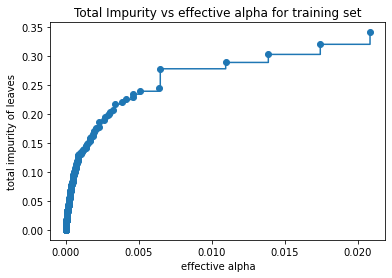

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In the above plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node.

In [ ]:
clfs = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    # print(alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

In [ ]:
cpp_alphas_value = []
for alpha in ccp_alphas:
  cpp_alphas_value.append(alpha)


In [ ]:
import pickle as pkl
path ='/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4'
filename = 'cpp_alpha'
pkl.dump(cpp_alphas_value, open(path+'/'+filename, 'wb'))

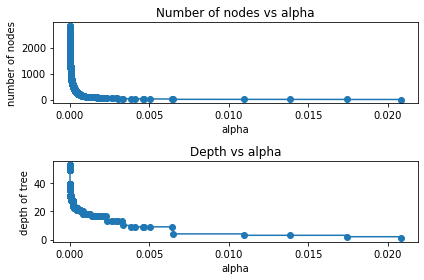

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Here we see that the number of nodes and tree depth decreases as alpha increases.

#### **Accuracy vs alpha for training and testing sets**

In [ ]:
accuracy_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=accuracy_score(y_train,pred_train3)
    accuracy_train.append(values_train)

In [ ]:
accuracy_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=accuracy_score(y_test,pred_test3)
    accuracy_test.append(values_test)

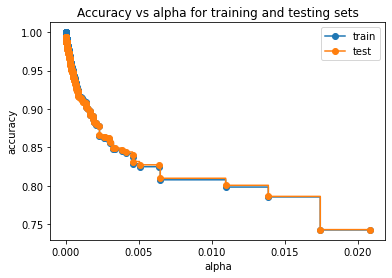

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(accuracy_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=5.370988070836569e-06, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')


In [ ]:
find_metrics("Decision Tree",best_model,X_train,X_test,y_train,y_test)

,model,train_accuracy,train_precision,train_recall,train_f1_score,train_tn fp fn tp,train_auc_roc,test_accuracy,test_precision,test_recall,test_f1_score,test_tn fp fn tp,test_auc_roc
0,Decision Tree,0.999983,1.0,0.999967,0.999983,"[89864, 0, 3, 89669]",0.999983,0.993873,0.990742,0.997116,0.993919,"[22136, 210, 65, 22473]",0.993859


In [ ]:
# Save the model
import pickle as pkl
path ='/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4'
filename = 'decision_Tree.pkl'
pkl.dump(best_model, open(path+'/'+filename, 'wb'))

In [ ]:
  dt_clf = pkl.load(open(path+'/'+filename, 'rb'))

In [ ]:
find_metrics("Decision Tree", dt_clf,X_train,X_test,y_train,y_test)

,model,train_accuracy,train_precision,train_recall,train_f1_score,train_tn fp fn tp,train_auc_roc,test_accuracy,test_precision,test_recall,test_f1_score,test_tn fp fn tp,test_auc_roc
0,Decision Tree,0.999983,1.0,0.999967,0.999983,"[89864, 0, 3, 89669]",0.999983,0.993873,0.990742,0.997116,0.993919,"[22136, 210, 65, 22473]",0.993859


### **Feature Importance**

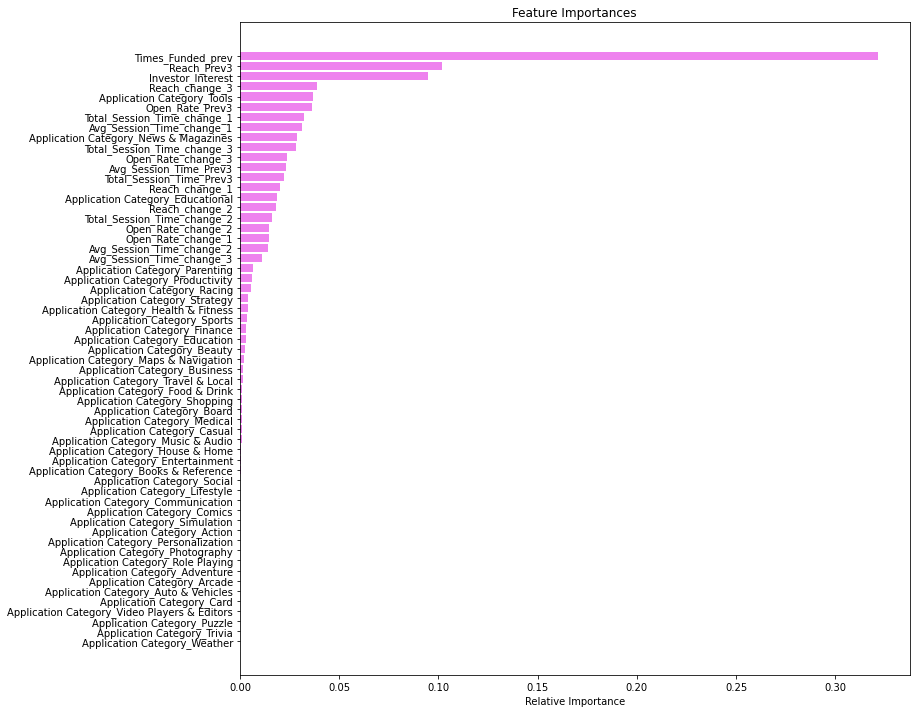

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_name[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Gradient Boosting Classifier

### **Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(ccp_alpha=8.911861687906602e-06)
model.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=8.911861687906602e-06,
                           criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
GradientBoostingClassifier()

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
find_metrics("GBM",model,X_train,X_test,y_train,y_test)

,model,train_accuracy,train_precision,train_recall,train_f1_score,train_tn fp fn tp,train_auc_roc,test_accuracy,test_precision,test_recall,test_f1_score,test_tn fp fn tp,test_auc_roc
0,GBM,0.947983,0.96379,0.930826,0.947021,"[86728, 3136, 6203, 83469]",0.947964,0.944925,0.963418,0.925459,0.944057,"[21554, 792, 1680, 20858]",0.945008


# **XGboost Classifier**

In [ ]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 
steps = 20  # The number of training iterations

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_clf = xgb.XGBClassifier(n_estimators=100)

In [ ]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
find_metrics("XGB",xgb_clf,X_train,X_test,y_train,y_test)

,model,train_accuracy,train_precision,train_recall,train_f1_score,train_tn fp fn tp,train_auc_roc,test_accuracy,test_precision,test_recall,test_f1_score,test_tn fp fn tp,test_auc_roc
0,XGB,0.94156,0.959718,0.921681,0.940315,"[86395, 3469, 7023, 82649]",0.941539,0.94214,0.960552,0.922664,0.941227,"[21492, 854, 1743, 20795]",0.942223
